In [1]:
import datetime
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import statsmodels.api as sm
import warnings
from tqdm.notebook import tqdm
warnings.filterwarnings("ignore")
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
sns.set_theme(context='talk', style='whitegrid', palette='deep')
plt.rcParams['figure.figsize'] = 12, 8
plt.rcParams['font.size'] = 20
plt.rcParams['axes.labelsize'] = 25
plt.rcParams['figure.titlesize'] = 32
plt.rcParams['axes.titlesize'] = 32
plt.rcParams['savefig.format'] = 'pdf'
plt.rcParams['figure.autolayout'] = 'true'
plt.rcParams['figure.frameon'] = 'false'
plt.rcParams['axes.spines.left'] = 'false'
plt.rcParams['axes.spines.right'] = 'false'
plt.rcParams['axes.spines.top'] = 'false'
plt.rcParams['legend.fancybox'] = 'false'
plt.rcParams['axes.spines.bottom'] = 'false'
plt.rcParams['font.size'] = 20
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.facecolor'] = 'white'
# для графиков, где надо много цветов, юзайте воть:
sns.set_palette(sns.color_palette('deep'))
# а по дефолту воть:
sns.set_palette(sns.color_palette("BuGn_r", n_colors=10)[2::3])
pd.set_option('display.max_columns', 60)

In [2]:
df = pd.read_pickle("feeding_and_details.pkl")

In [3]:
monthly_feeding = pd.read_excel("smth.xlsx", sheet_name="Feeding (monthly)")
herd_metrics = pd.read_excel("smth.xlsx", sheet_name="Herd maintenance", header=1, skiprows=[2]).replace("-", np.nan)
production_indicators = pd.read_excel("smth.xlsx", sheet_name="Dairy indicators", header=1, skiprows=[2]).replace("-", np.nan)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16411365 entries, 0 to 16411364
Data columns (total 18 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   FeedingTaskID                object 
 1   Date                         object 
 2   FarmName                     object 
 3   FeedNumber                   int64  
 4   SectionID                    int64  
 5   PhysiologicalGroupID         int64  
 6   PhysiologicalGroupName       object 
 7   PhysiologicalGroupHeadCount  int64  
 8   Appetite                     float64
 9   RationName                   object 
 10  RationPart                   float64
 11  TotalWeight_kg               float64
 12  CompletedAt                  object 
 13  year                         object 
 14  IngredientID                 float64
 15  IngredientName               object 
 16  IngredientType               object 
 17  PhysicalWeight_kg            float64
dtypes: float64(5), int64(4), object(9)
memor

In [5]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

In [6]:
df.Date.describe()

count                         16411365
mean     2024-03-20 16:06:21.971006464
min                2022-01-01 00:00:00
25%                2023-06-18 00:00:00
50%                2024-04-09 00:00:00
75%                2025-01-18 00:00:00
max                2025-10-22 00:00:00
Name: Date, dtype: object

<Axes: xlabel='RationPart', ylabel='Count'>

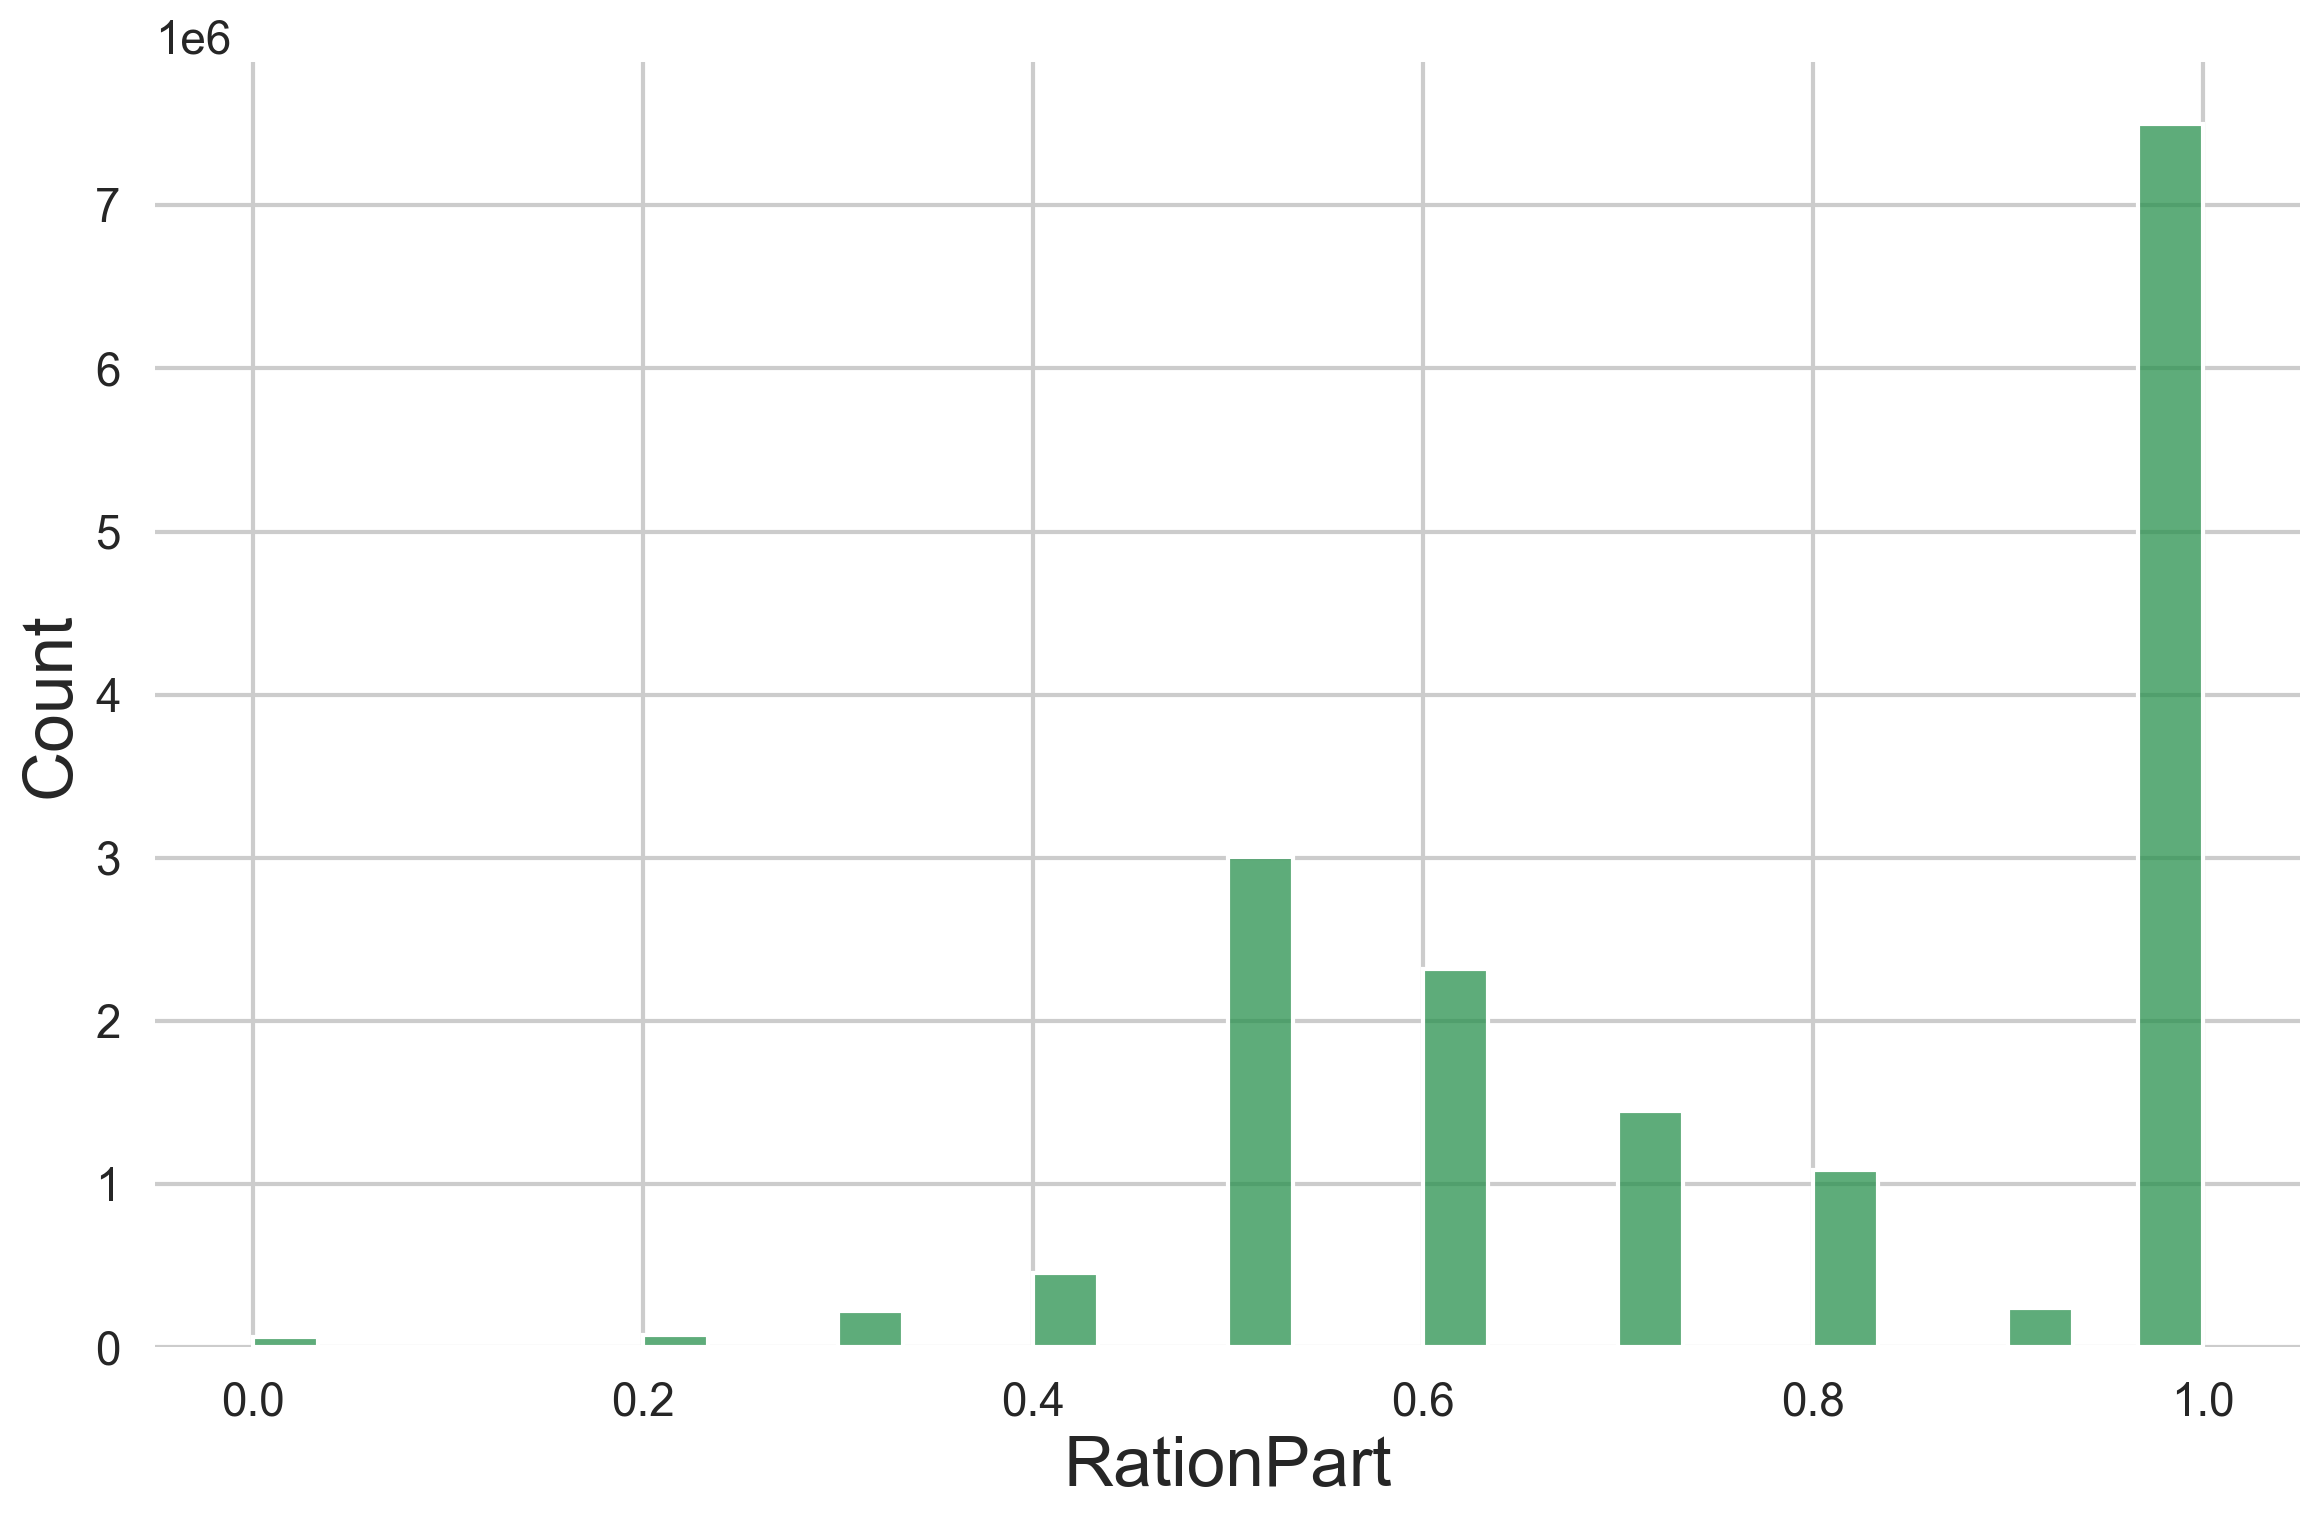

In [7]:
sns.histplot(df.RationPart, bins=30)

In [8]:
df

FeedingTaskID       Date  \
0         Farms/EkoNiva1C.216d4235-2852-11e8-80c4-1c98ec... 2022-01-01   
1         Farms/EkoNiva1C.216d4235-2852-11e8-80c4-1c98ec... 2022-01-01   
2         Farms/EkoNiva1C.216d4235-2852-11e8-80c4-1c98ec... 2022-01-01   
3         Farms/EkoNiva1C.216d4235-2852-11e8-80c4-1c98ec... 2022-01-01   
4         Farms/EkoNiva1C.216d4235-2852-11e8-80c4-1c98ec... 2022-01-01   
...                                                     ...        ...   
16411360  Farms/EkoNiva1C.6c69fe1b-2b6f-11e8-80c4-1c98ec... 2025-10-22   
16411361  Farms/EkoNiva1C.6c69fe1b-2b6f-11e8-80c4-1c98ec... 2025-10-22   
16411362  Farms/EkoNiva1C.6c69fe1b-2b6f-11e8-80c4-1c98ec... 2025-10-22   
16411363  Farms/EkoNiva1C.6c69fe1b-2b6f-11e8-80c4-1c98ec... 2025-10-22   
16411364  Farms/EkoNiva1C.6c69fe1b-2b6f-11e8-80c4-1c98ec... 2025-10-22   

               FarmName  FeedNumber  SectionID  PhysiologicalGroupID  \
0            ЖК Добрино          15          9                     2   
1            ЖК Добрино          15          9                     2   
2            ЖК Добрино          15          9                     2   
3            ЖК Добрино          15          9                     2   
4            ЖК Добрино          15          9                     2   
...                 ...         ...        ...                   ...   
16411360  ЖК Подболотье          20        131                     1   
16411361  ЖК Подболотье          20        131                     1   
16411362  ЖК Подболотье          20        131                     1   
16411363  ЖК Подболотье          20        131                     1   
16411364  ЖК Подболотье          20        131                     1   

         PhysiologicalGroupName  PhysiologicalGroupHeadCount  Appetite  \
0                            Д1                          352       0.9   
1                            Д1                          352       0.9   
2                            Д1                          352       0.9   
3                            Д1                          352       0.9   
4                            Д1                          352       0.9   
...                         ...                          ...       ...   
16411360                 Нетели                           32       1.2   
16411361                 Нетели                           32       1.2   
16411362                 Нетели                           32       1.2   
16411363                 Нетели                           32       1.2   
16411364                 Нетели                           32       1.2   

         RationName  RationPart  TotalWeight_kg                  CompletedAt  \
0                Д1         0.5          8324.0  2022-01-03T05:45:50.5175580   
1                Д1         0.5          8324.0  2022-01-03T05:45:50.5175580   
2                Д1         0.5          8324.0  2022-01-03T05:45:50.5175580   
3                Д1         0.5          8324.0  2022-01-03T05:45:50.5175580   
4                Д1         0.5          8324.0  2022-01-03T05:45:50.5175580   
...             ...         ...             ...                          ...   
16411360         С1         1.0          1106.0  2025-10-22T08:50:05.2368034   
16411361         С1         1.0          1106.0  2025-10-22T08:50:05.2368034   
16411362         С1         1.0          1106.0  2025-10-22T08:50:05.2368034   
16411363         С1         1.0          1106.0  2025-10-22T08:50:05.2368034   
16411364         С1         1.0          1106.0  2025-10-22T08:50:05.2368034   

          year  IngredientID          IngredientName  IngredientType  \
0         2022         125.0         Солома покупная          Forage   
1         2022         773.0      3645.01.01.01.1.20          Forage   
2         2022          72.0     Комбикорм 10 группы     Concentrate   
3         2022          82.0          Кукуруза сухая     Concentrate   
4         2022         129.0       Шрот подсолнечный     Concentrate   
...       

forage_cow  milk_cow
forage_cow     1.00000   0.99532
milk_cow       0.99532   1.00000

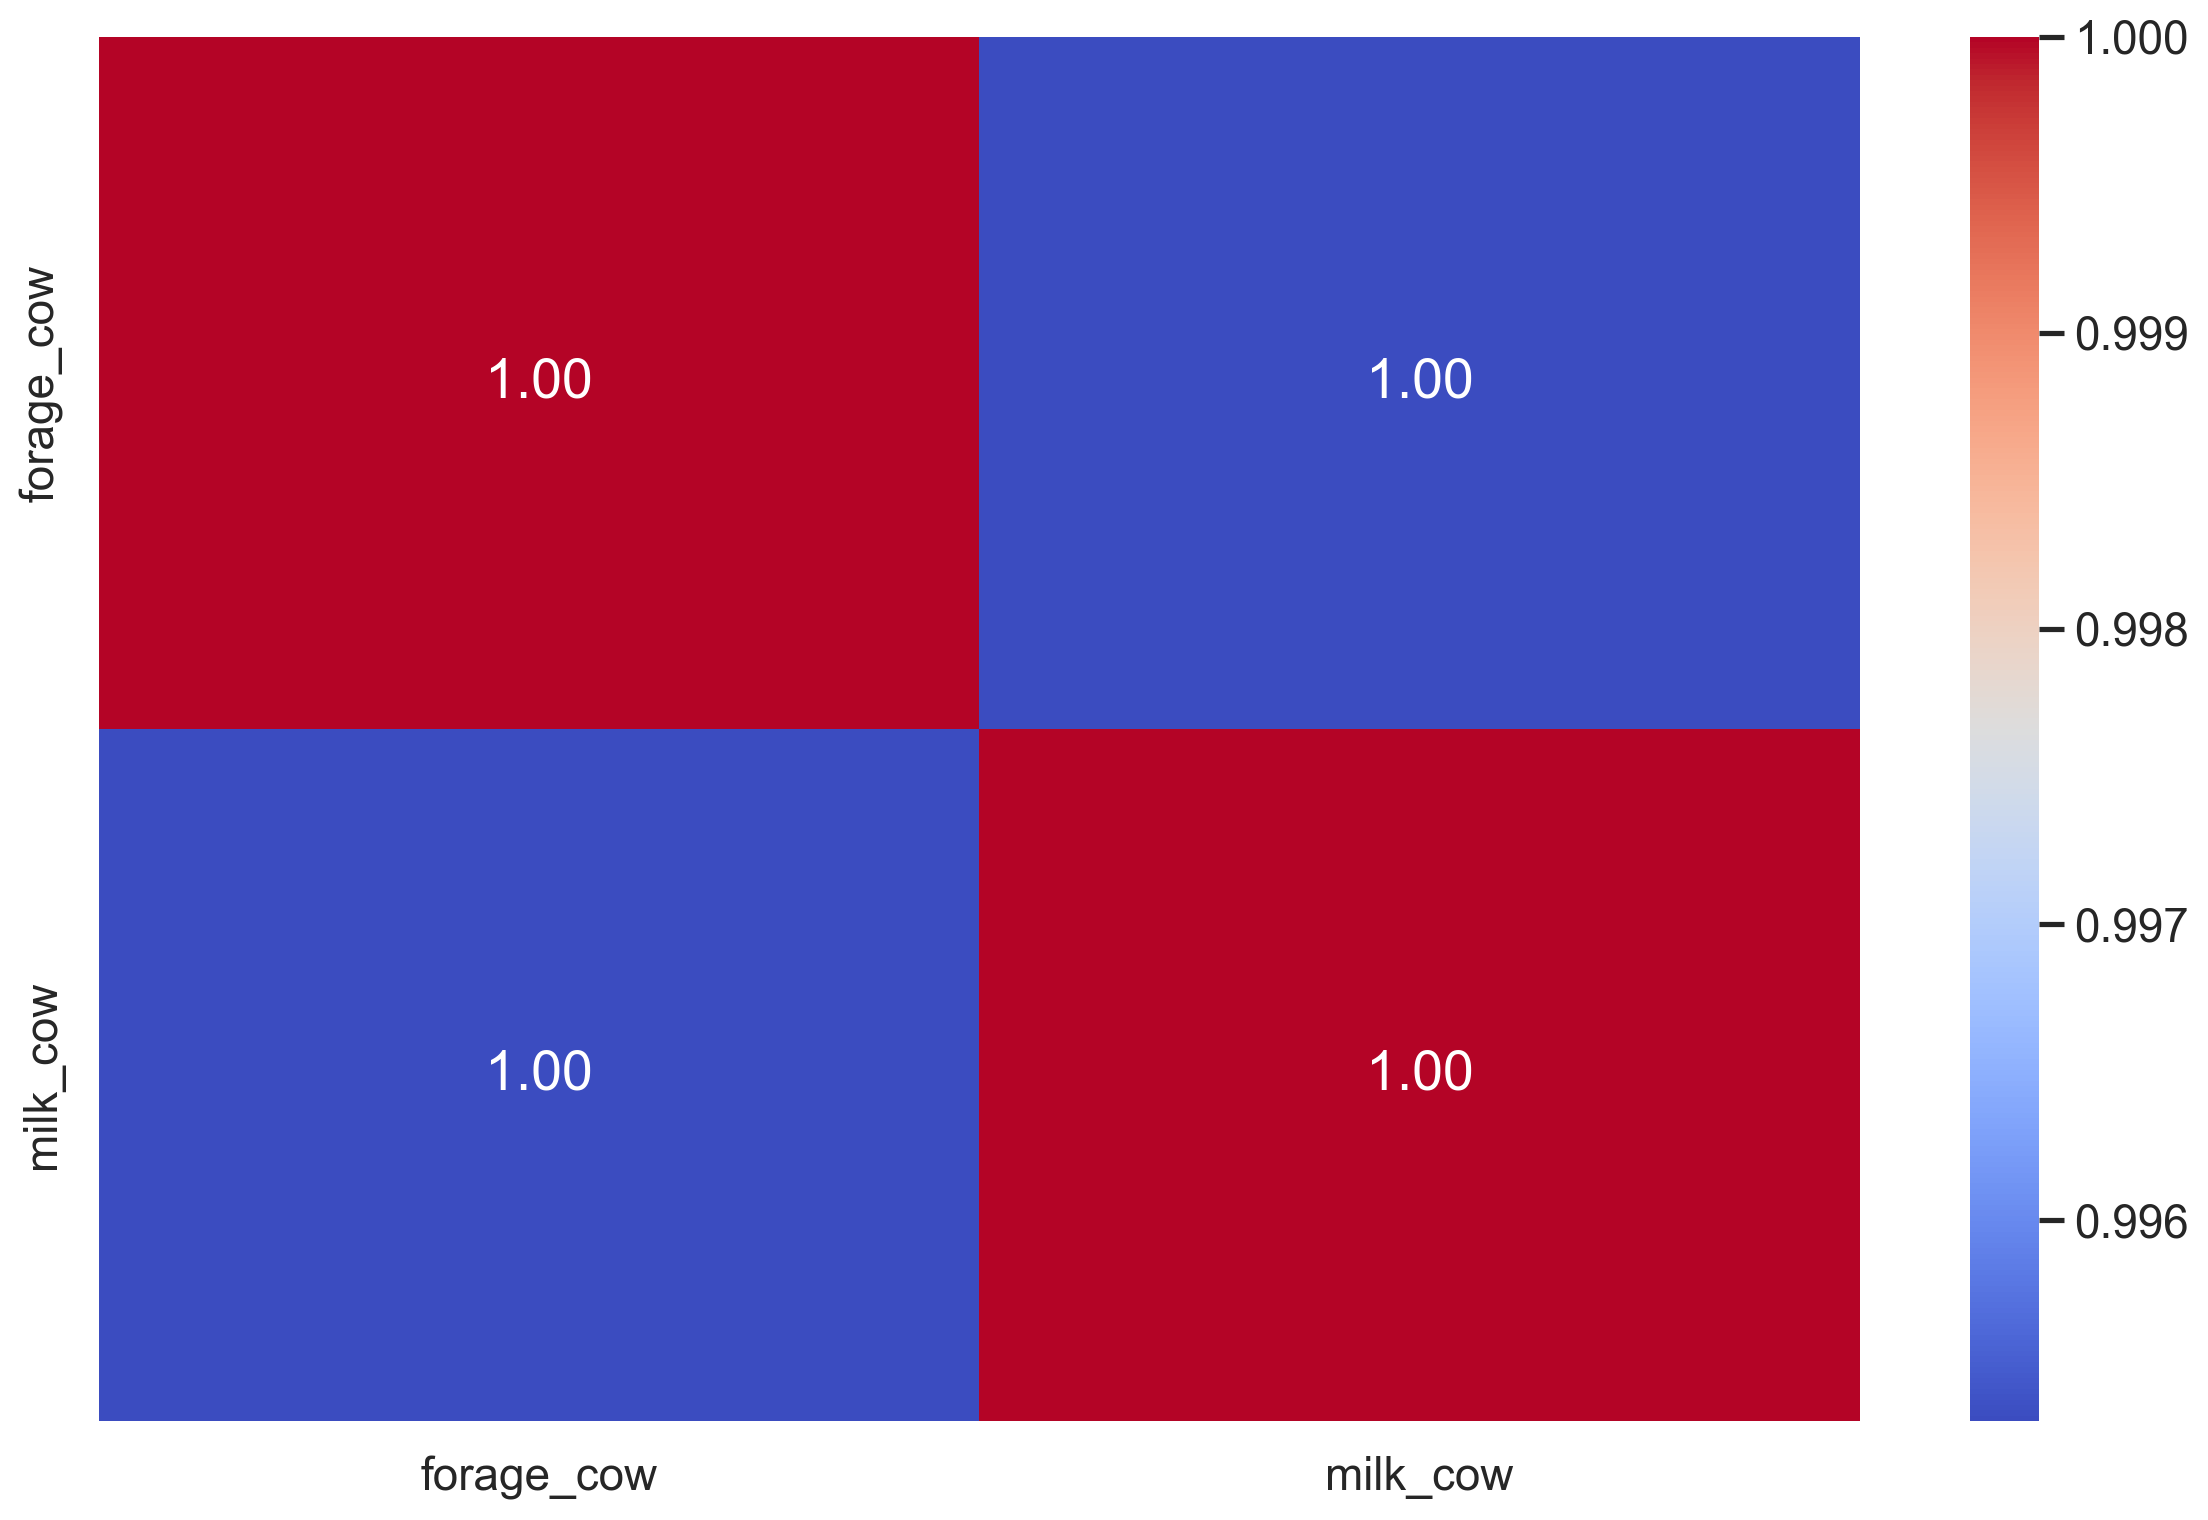

In [9]:
corr = herd_metrics[['forage_cow', 'milk_cow']].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
corr

In [10]:
herd_metrics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4301 entries, 0 to 4300
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   date                     4301 non-null   datetime64[ns]
 1   region                   4301 non-null   object        
 2   prod_farm_name           4301 non-null   object        
 3   farm_type                4301 non-null   object        
 4   farm_name                4301 non-null   object        
 5   ls_capacity              3615 non-null   float64       
 6   ls_occupancy             3579 non-null   float64       
 7   forage_cow               3603 non-null   float64       
 8   milk_cow                 3603 non-null   float64       
 9   dry_cow                  3603 non-null   float64       
 10  milk_marketab_prc        3546 non-null   float64       
 11  forcow_milk_yeild        1648 non-null   float64       
 12  forcow_milk_yeild_stand  1648 non-

In [11]:
production_indicators.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1747 entries, 0 to 1746
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   date                    1747 non-null   datetime64[ns]
 1   region                  1747 non-null   object        
 2   prod_farm_name          1747 non-null   object        
 3   farm_type               1747 non-null   object        
 4   farm_name               1747 non-null   object        
 5   cows_total              1741 non-null   float64       
 6   milk_cows               1741 non-null   float64       
 7   milk_cows_d0            1741 non-null   float64       
 8   milk_cows_d1            1741 non-null   float64       
 9   milk_cows_d2            1741 non-null   float64       
 10  milk_cows_d3            1741 non-null   float64       
 11  weekly_milking_per_cow  1298 non-null   float64       
 12  gross_milk_yield        840 non-null    float64 

<Axes: xlabel='milk_cows', ylabel='bull_num'>

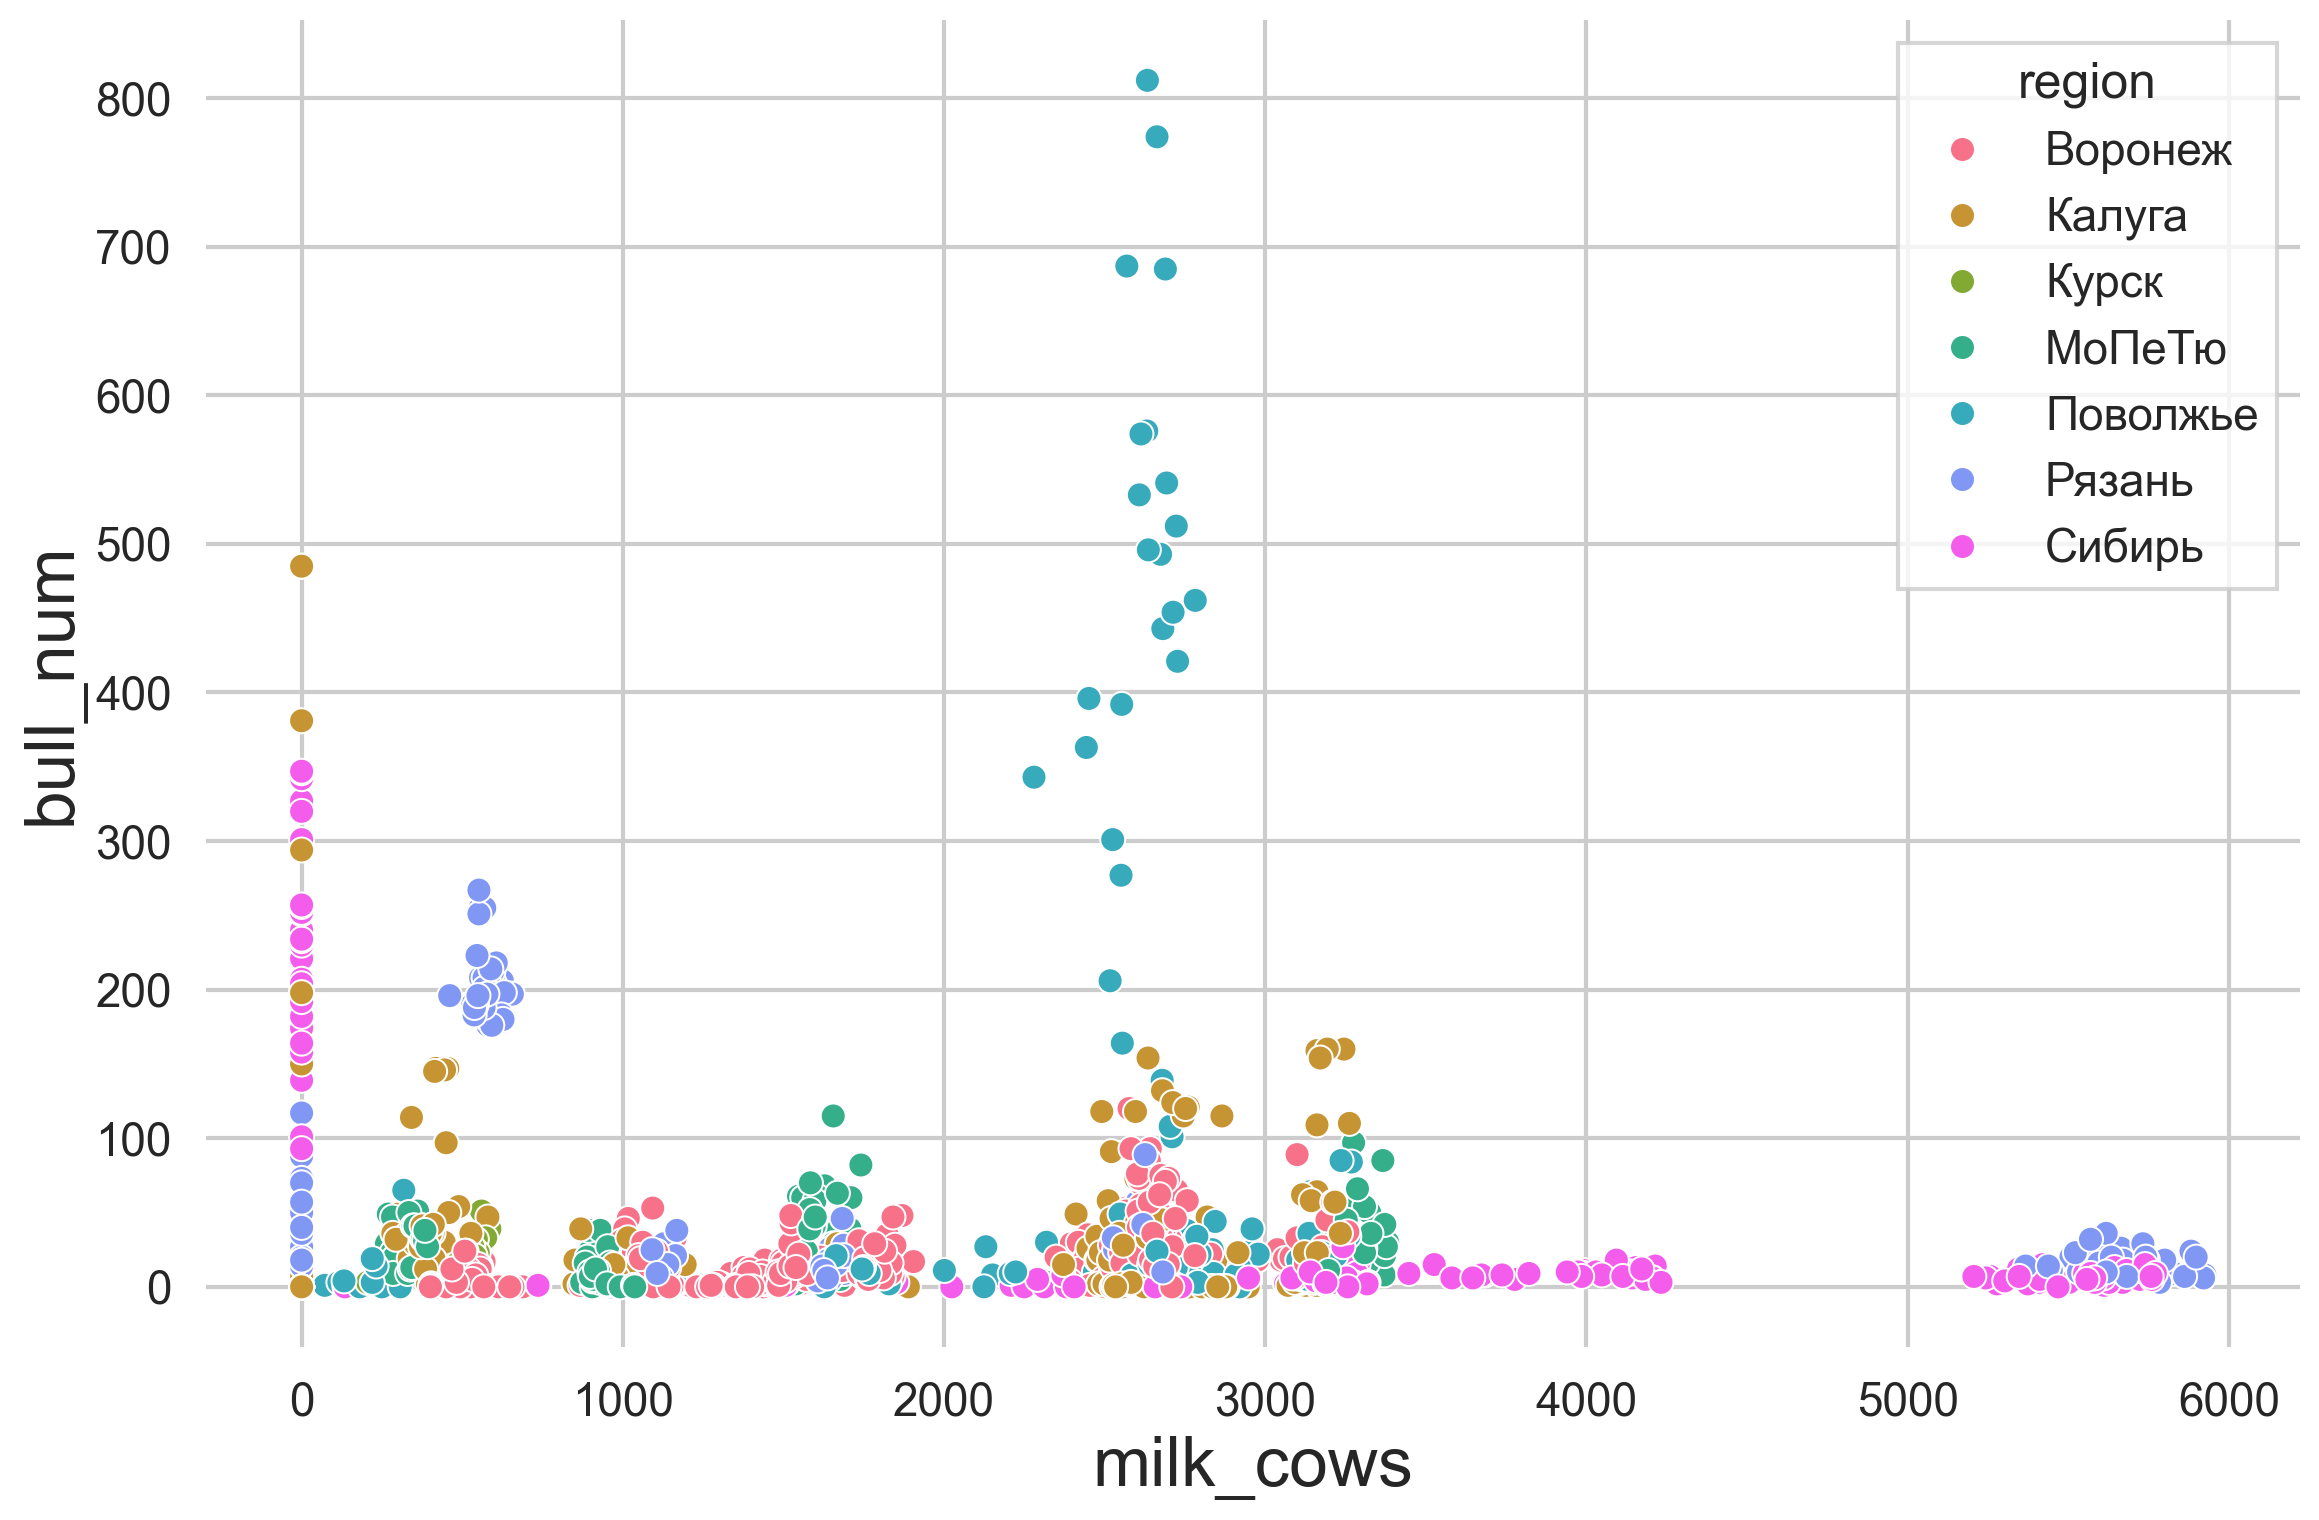

In [12]:
sns.scatterplot(data=production_indicators, x='milk_cows', y='bull_num', hue='region')

<Axes: xlabel='cow_retired_low_prod', ylabel='Count'>

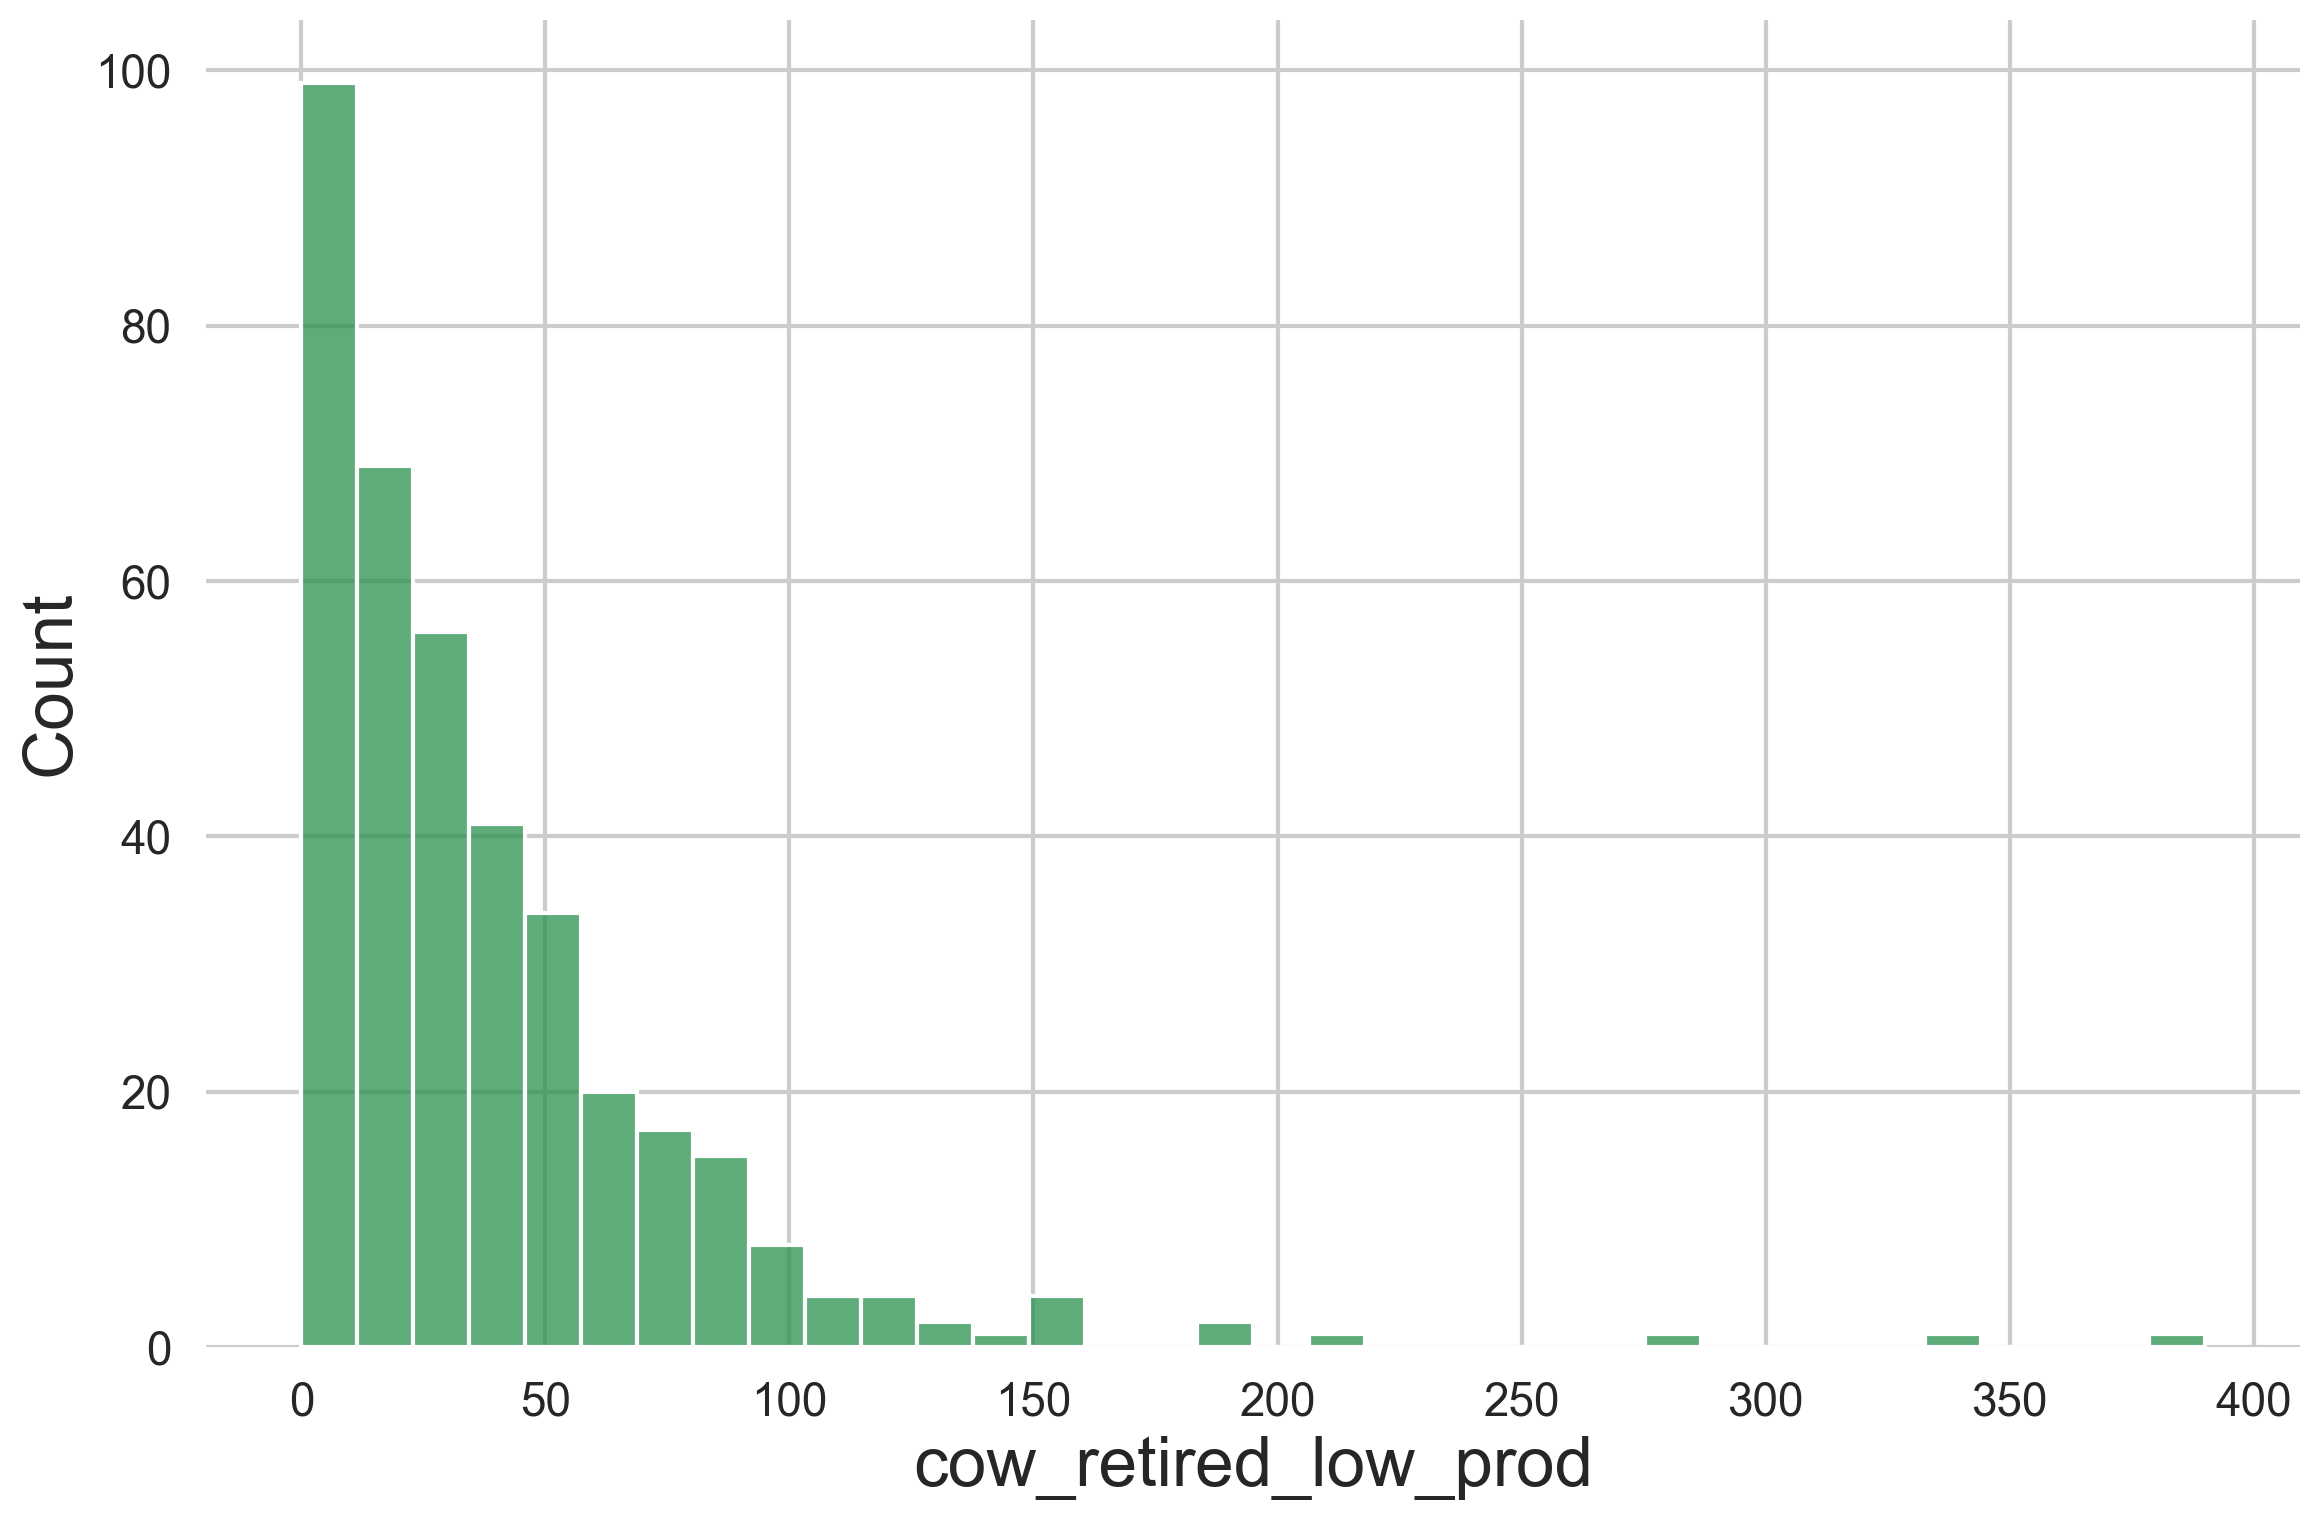

In [13]:
sns.histplot(production_indicators, x='cow_retired_low_prod')

<Axes: xlabel='milk_cows', ylabel='cow_retired_low_prod'>

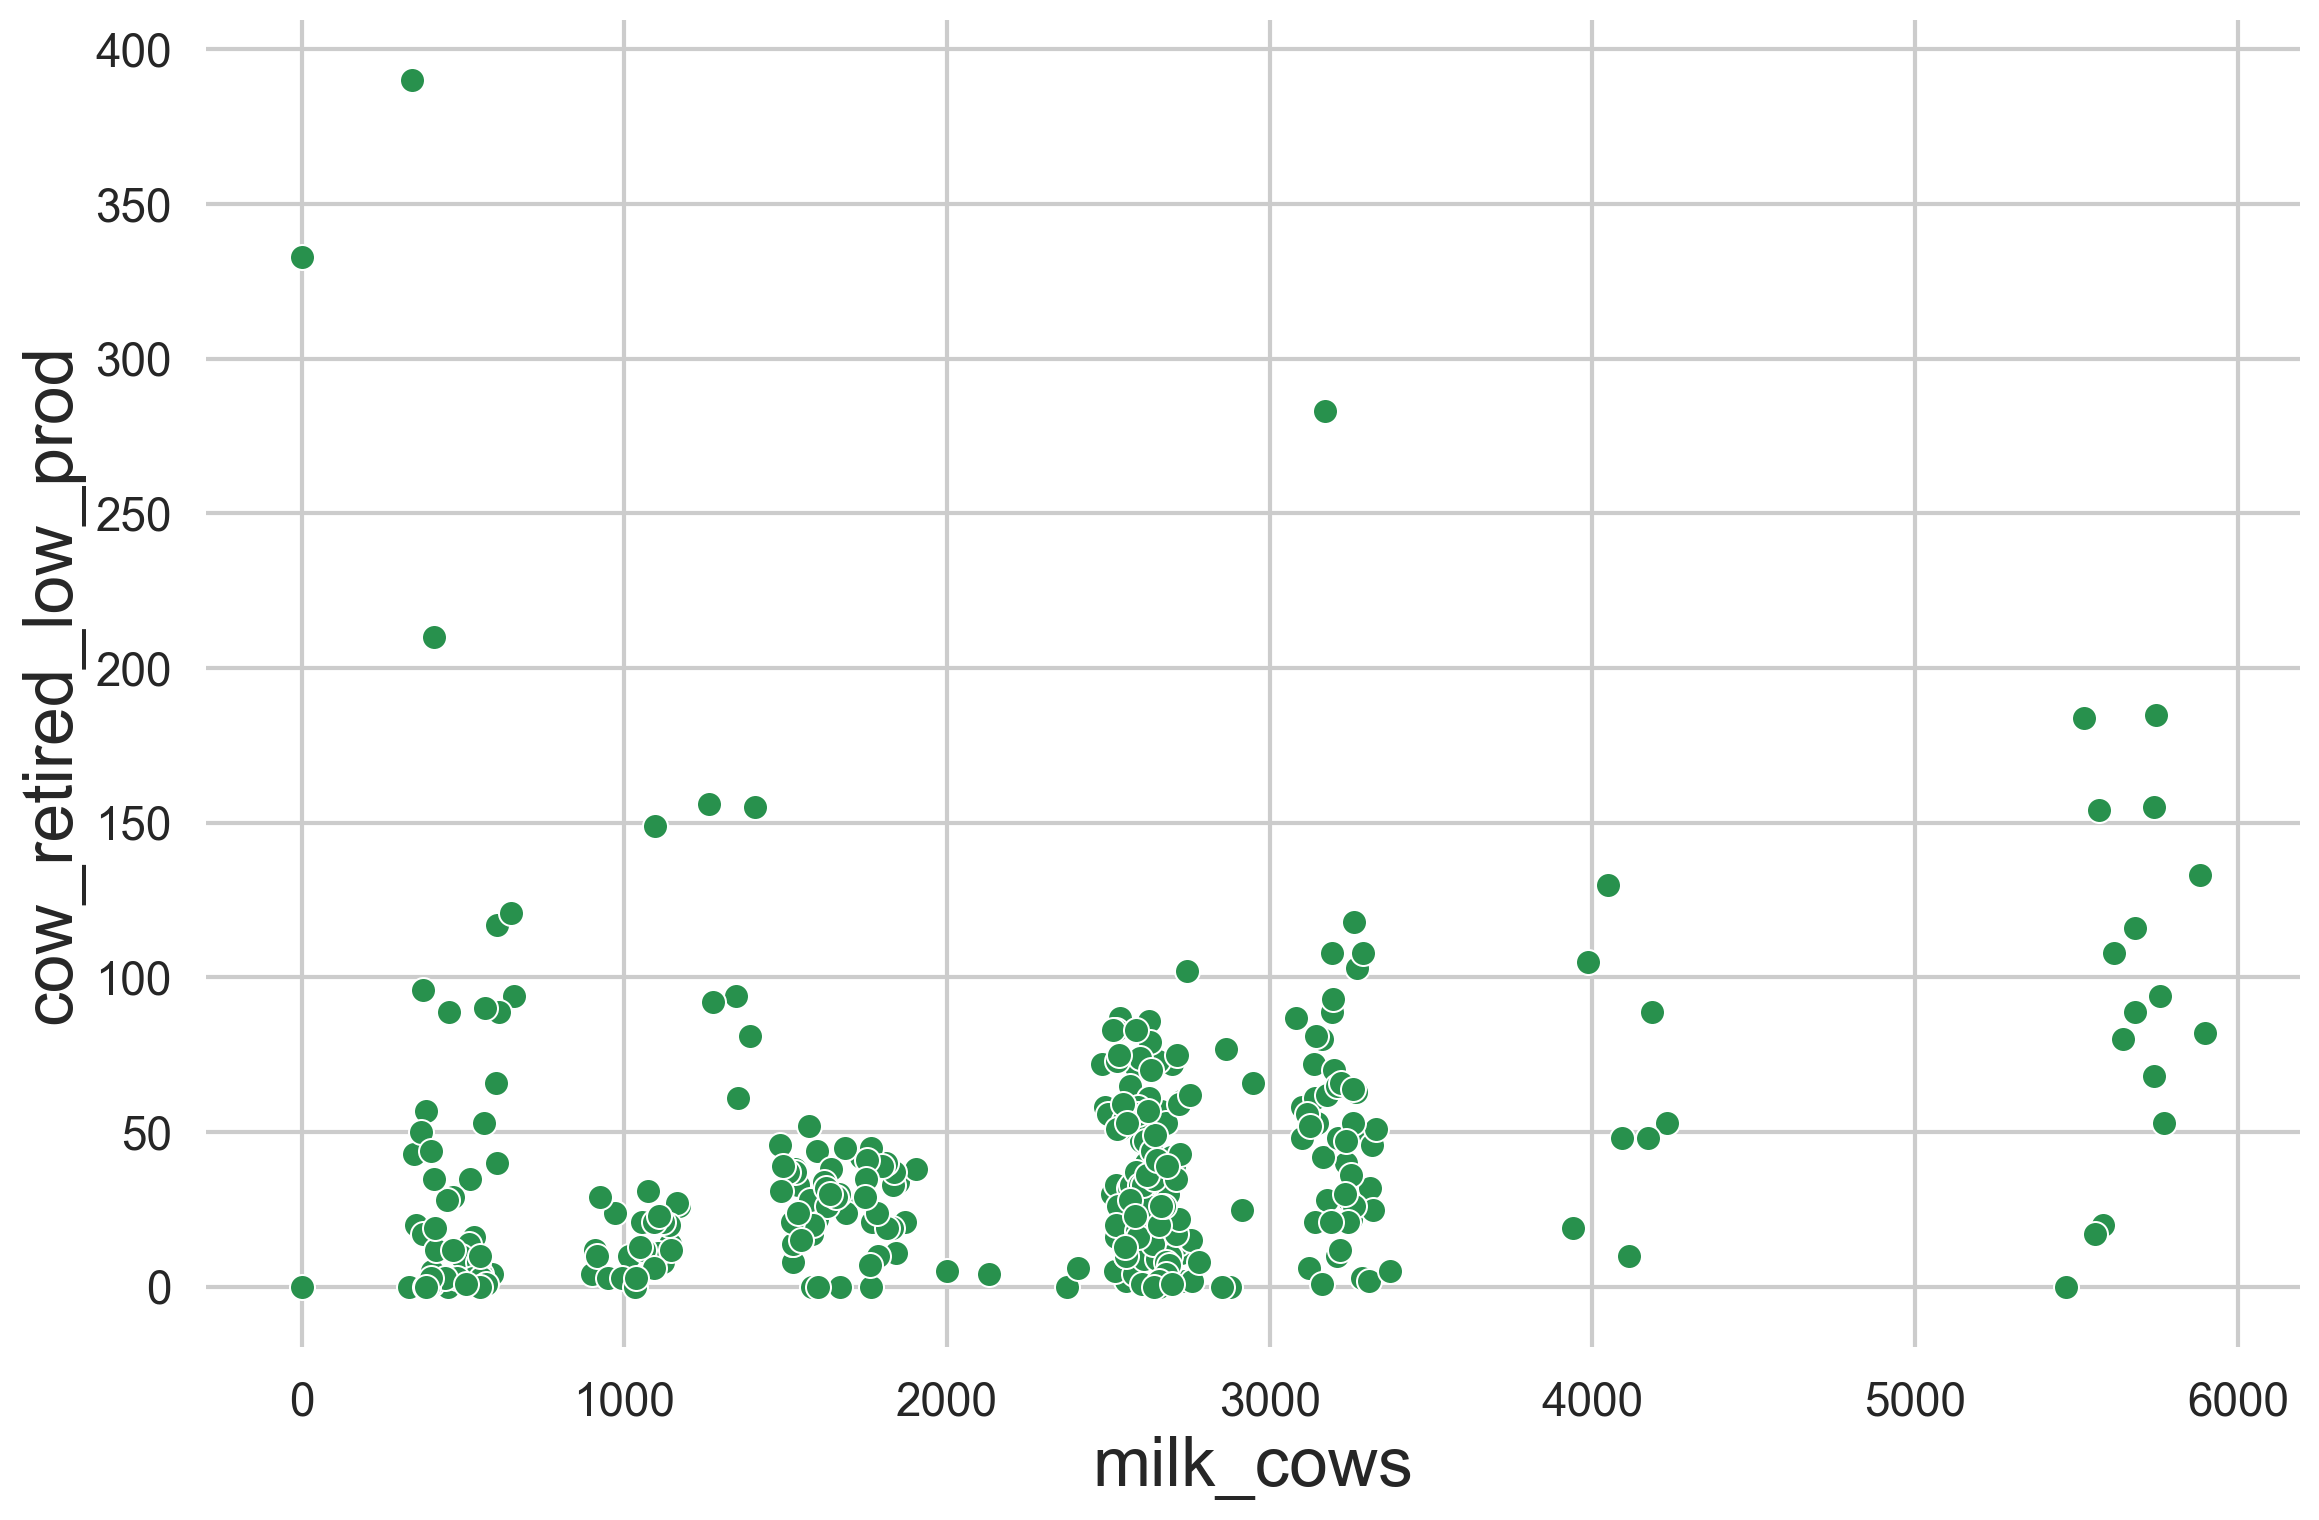

In [14]:
sns.scatterplot(data=production_indicators, x='milk_cows', y='cow_retired_low_prod')

<Axes: xlabel='bull_num', ylabel='cow_retired_low_prod'>

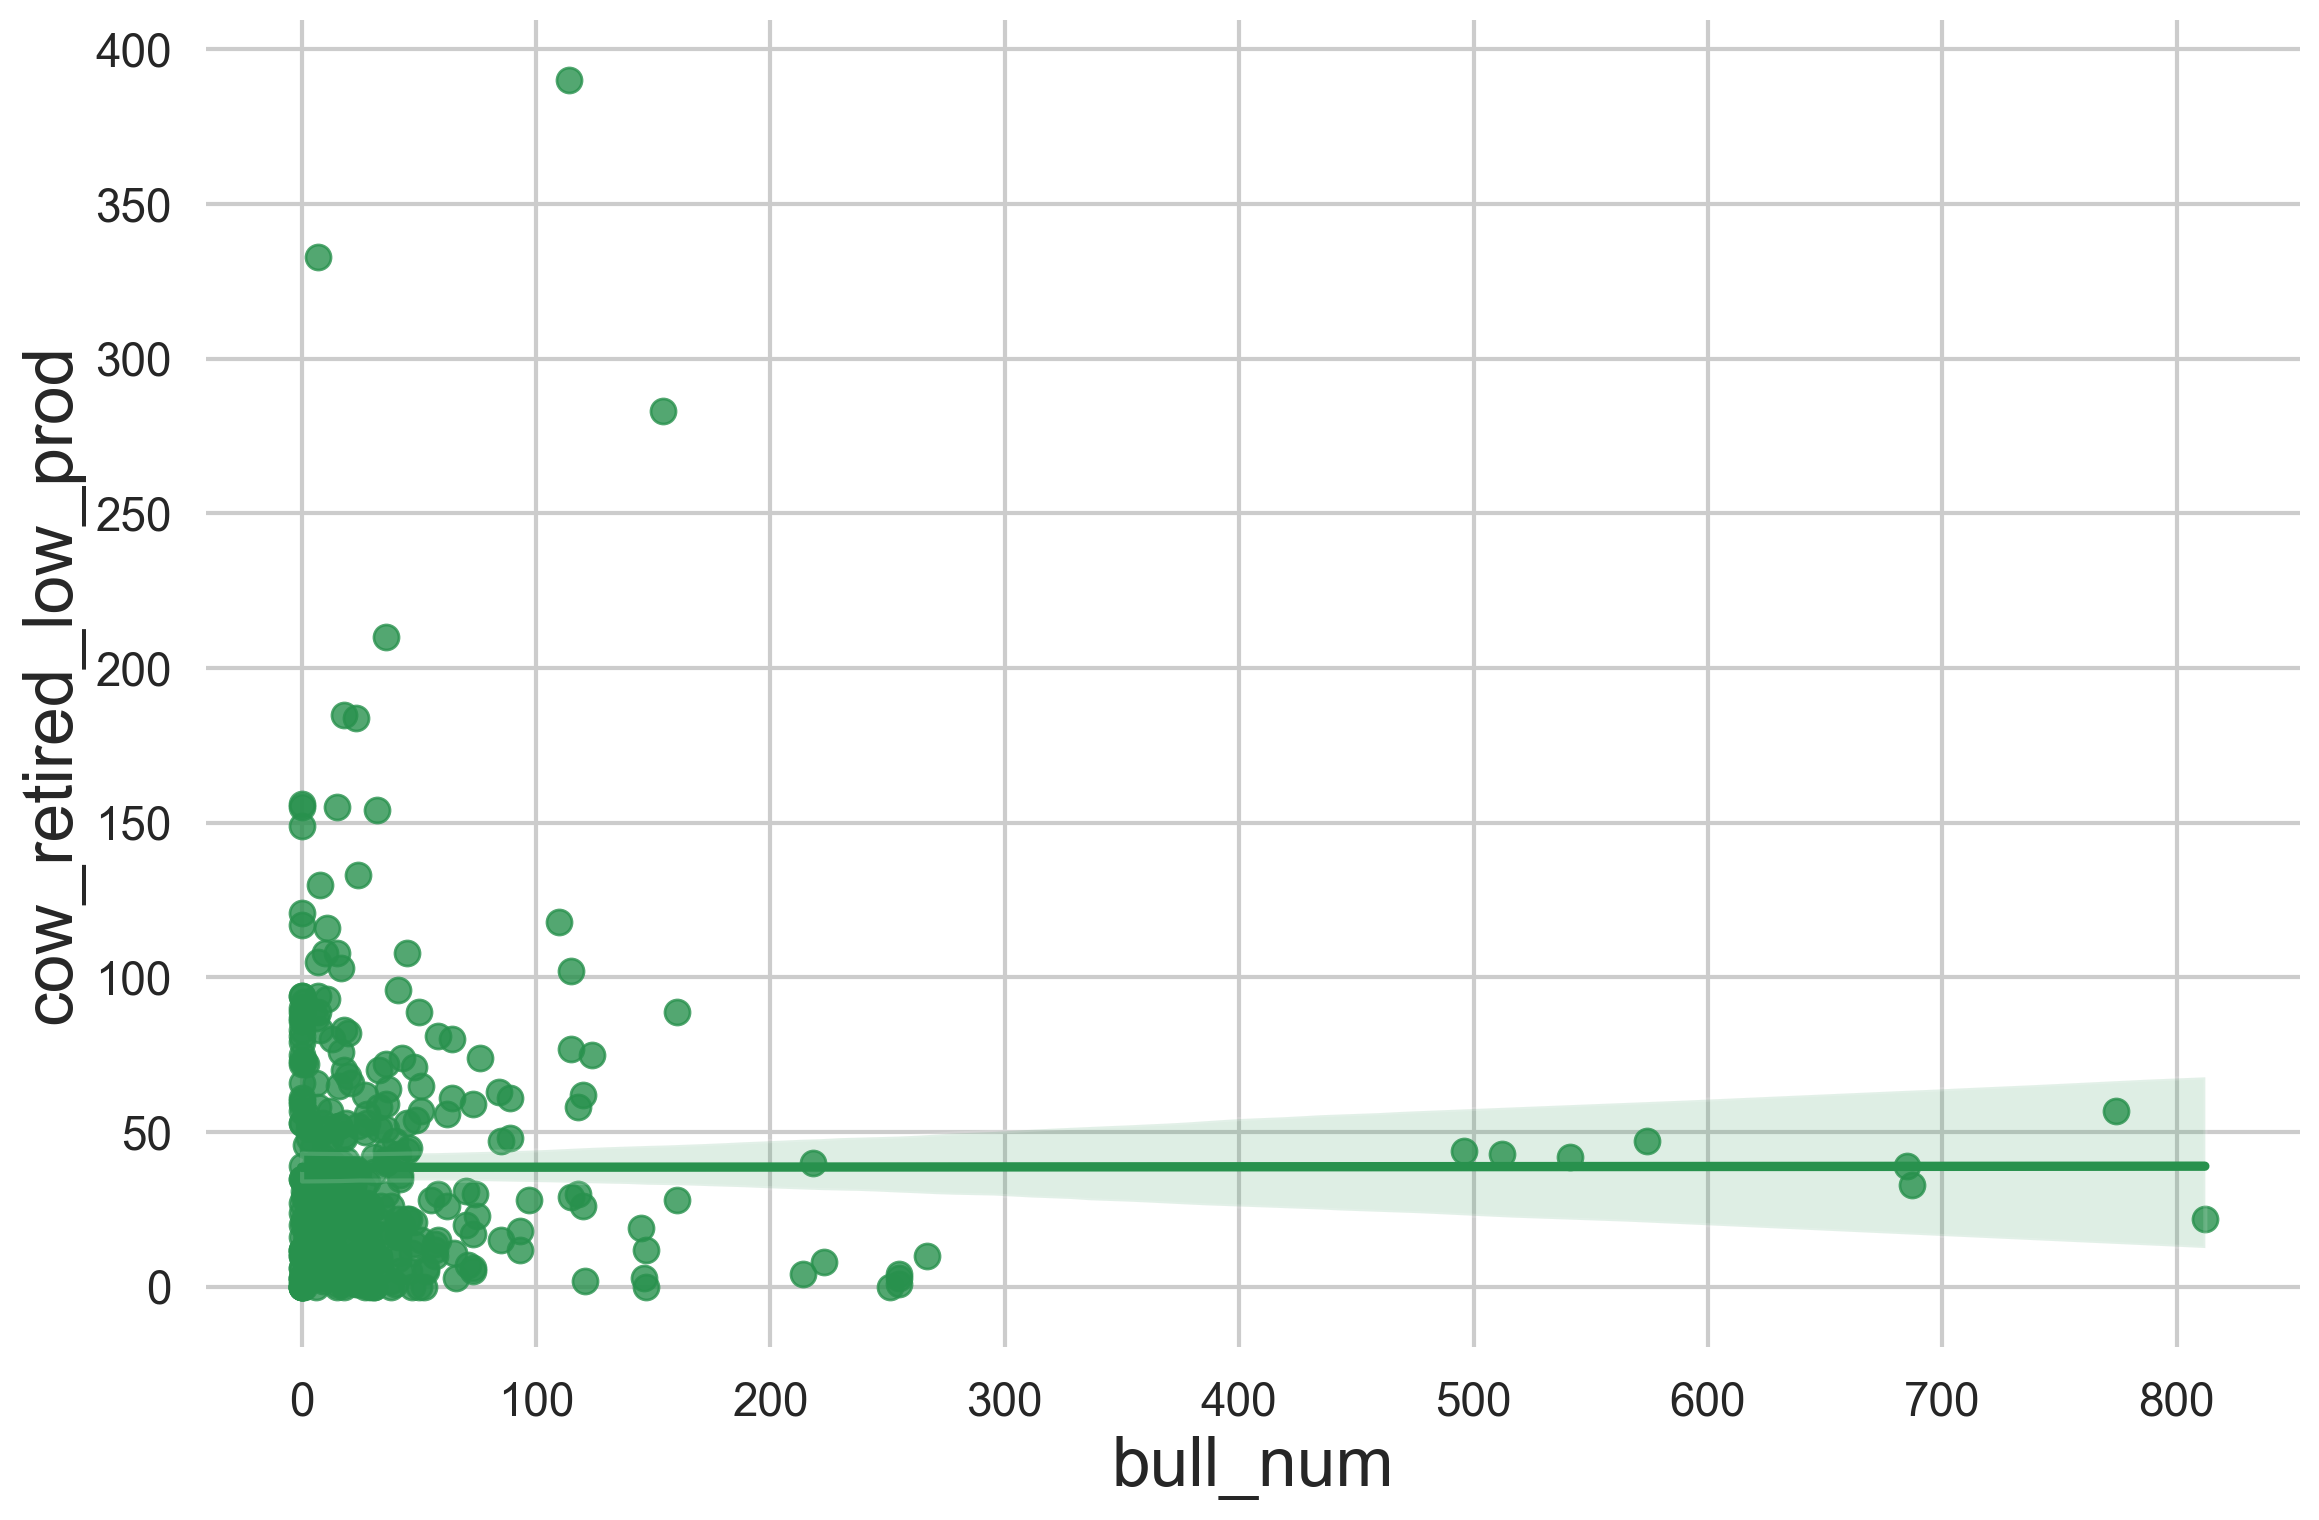

In [15]:
sns.regplot(data=production_indicators, x='bull_num', y='cow_retired_low_prod')

<Axes: xlabel='bull_num', ylabel='cow_retired'>

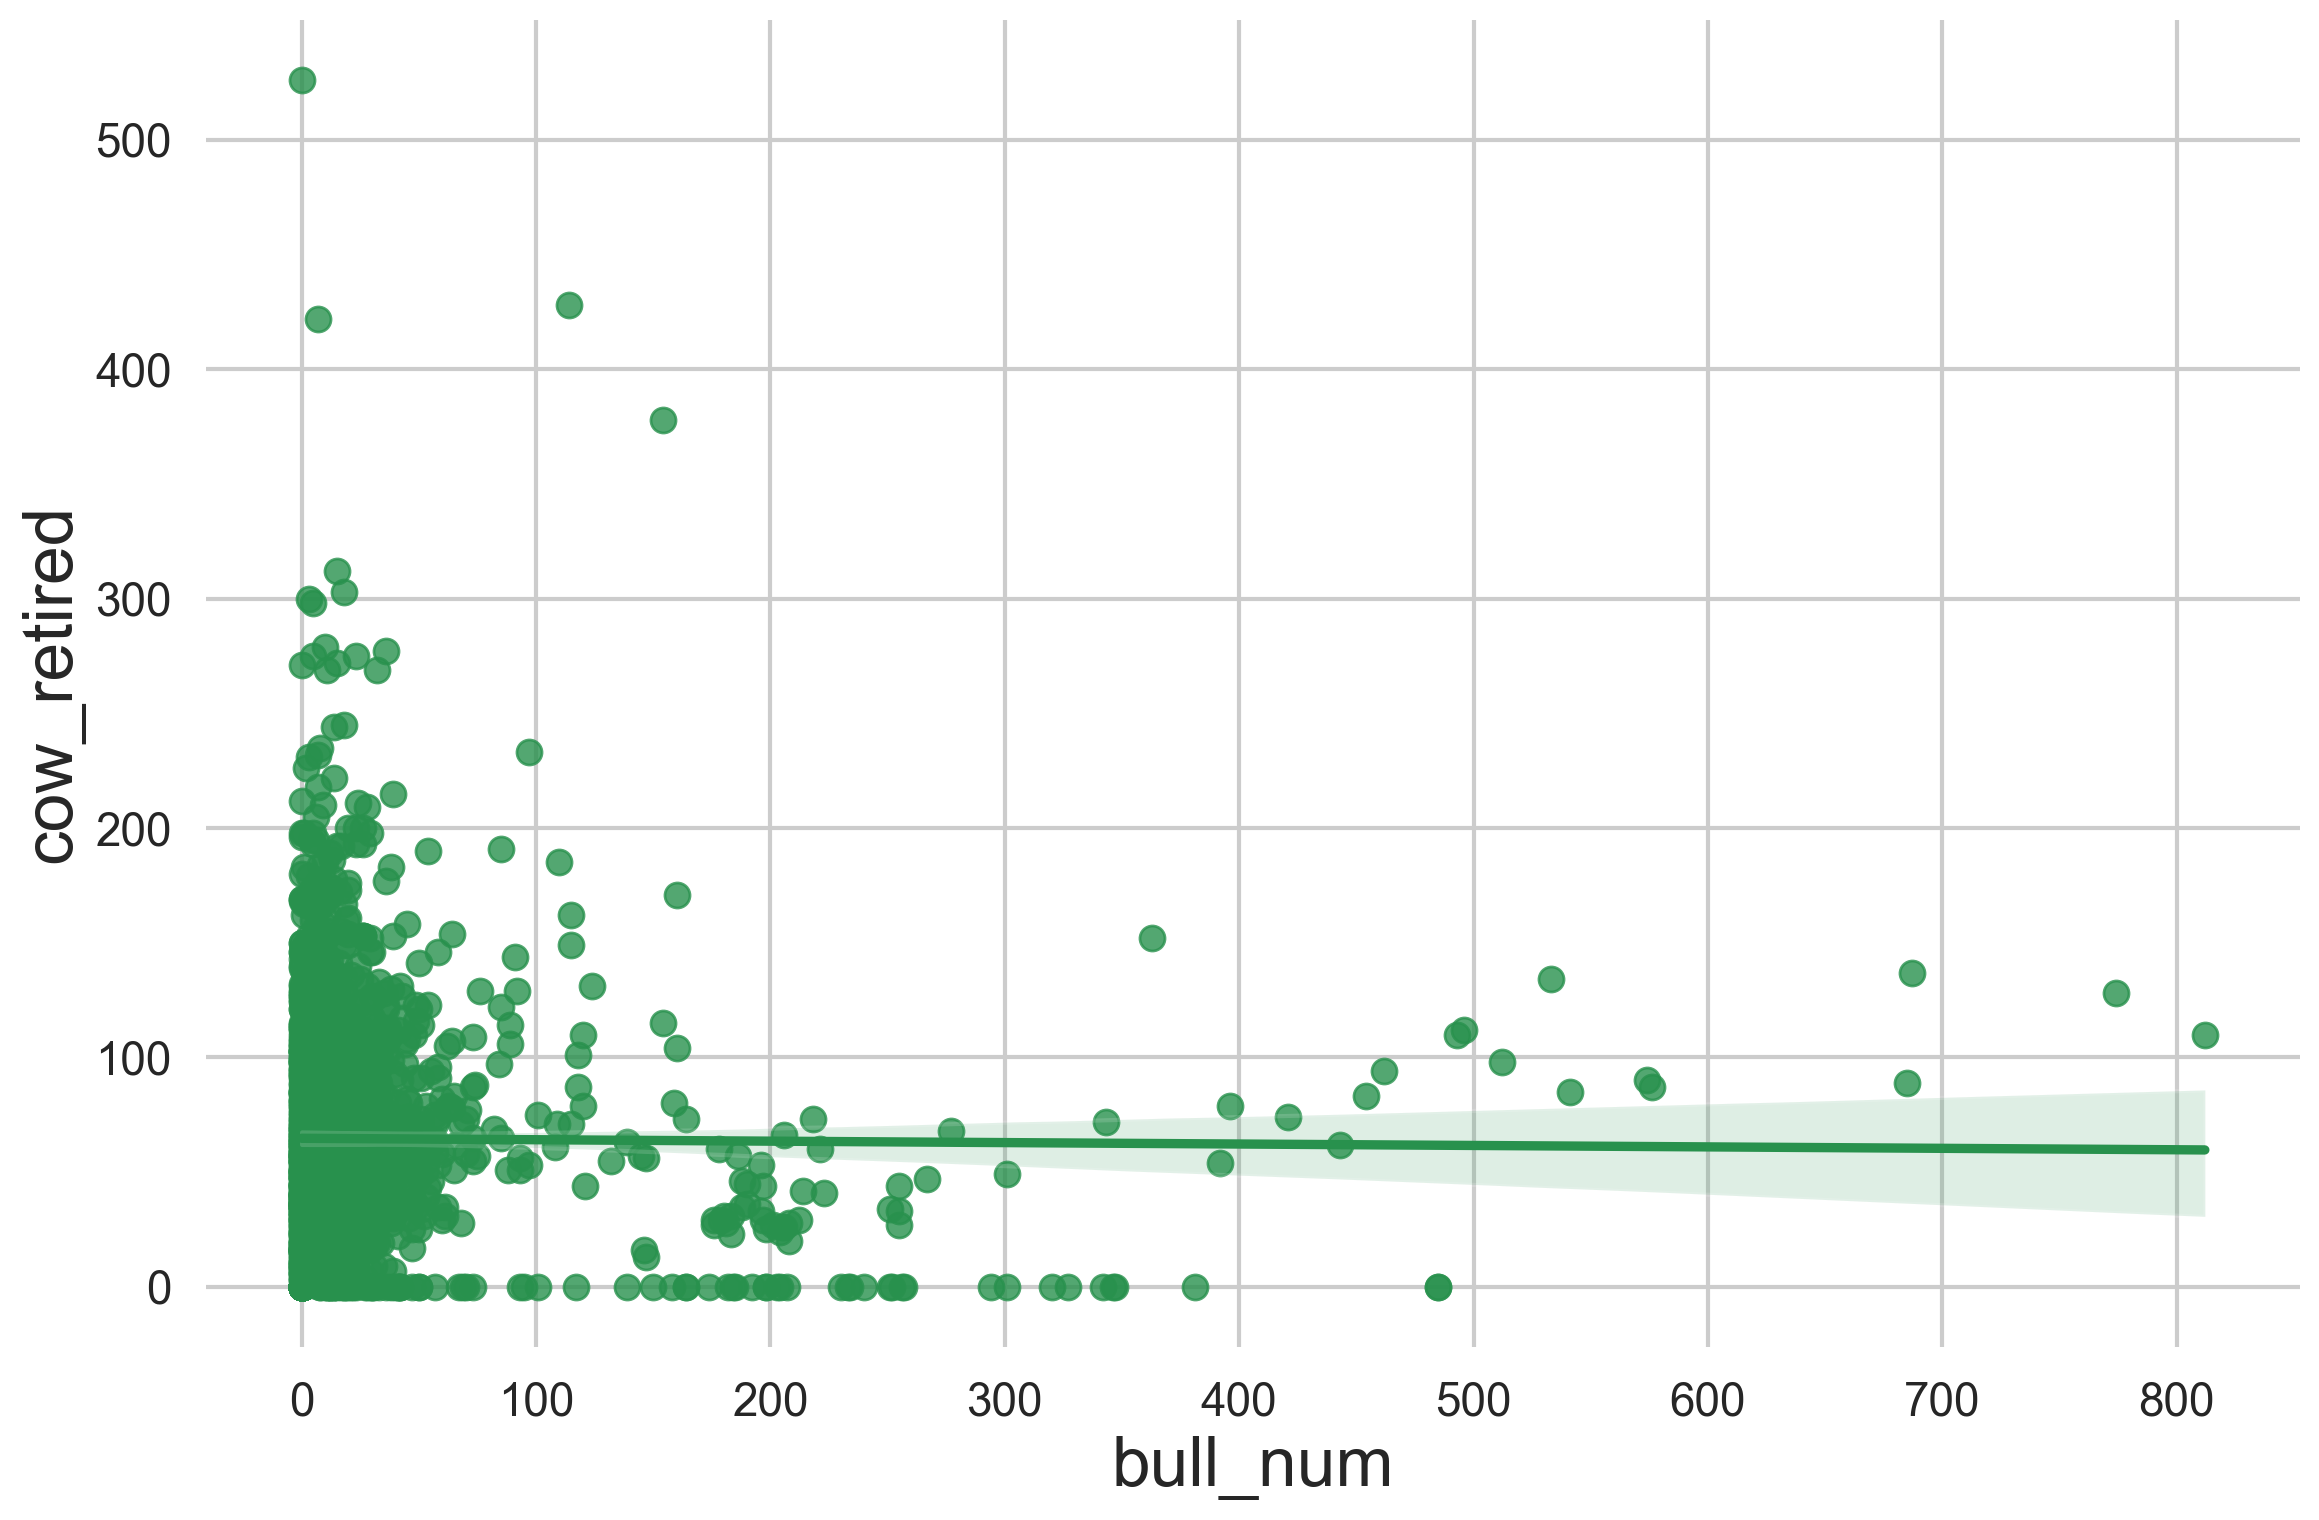

In [16]:
sns.regplot(data=production_indicators, x='bull_num', y='cow_retired')

<Axes: xlabel='weekly_milking_per_cow', ylabel='bull_num'>

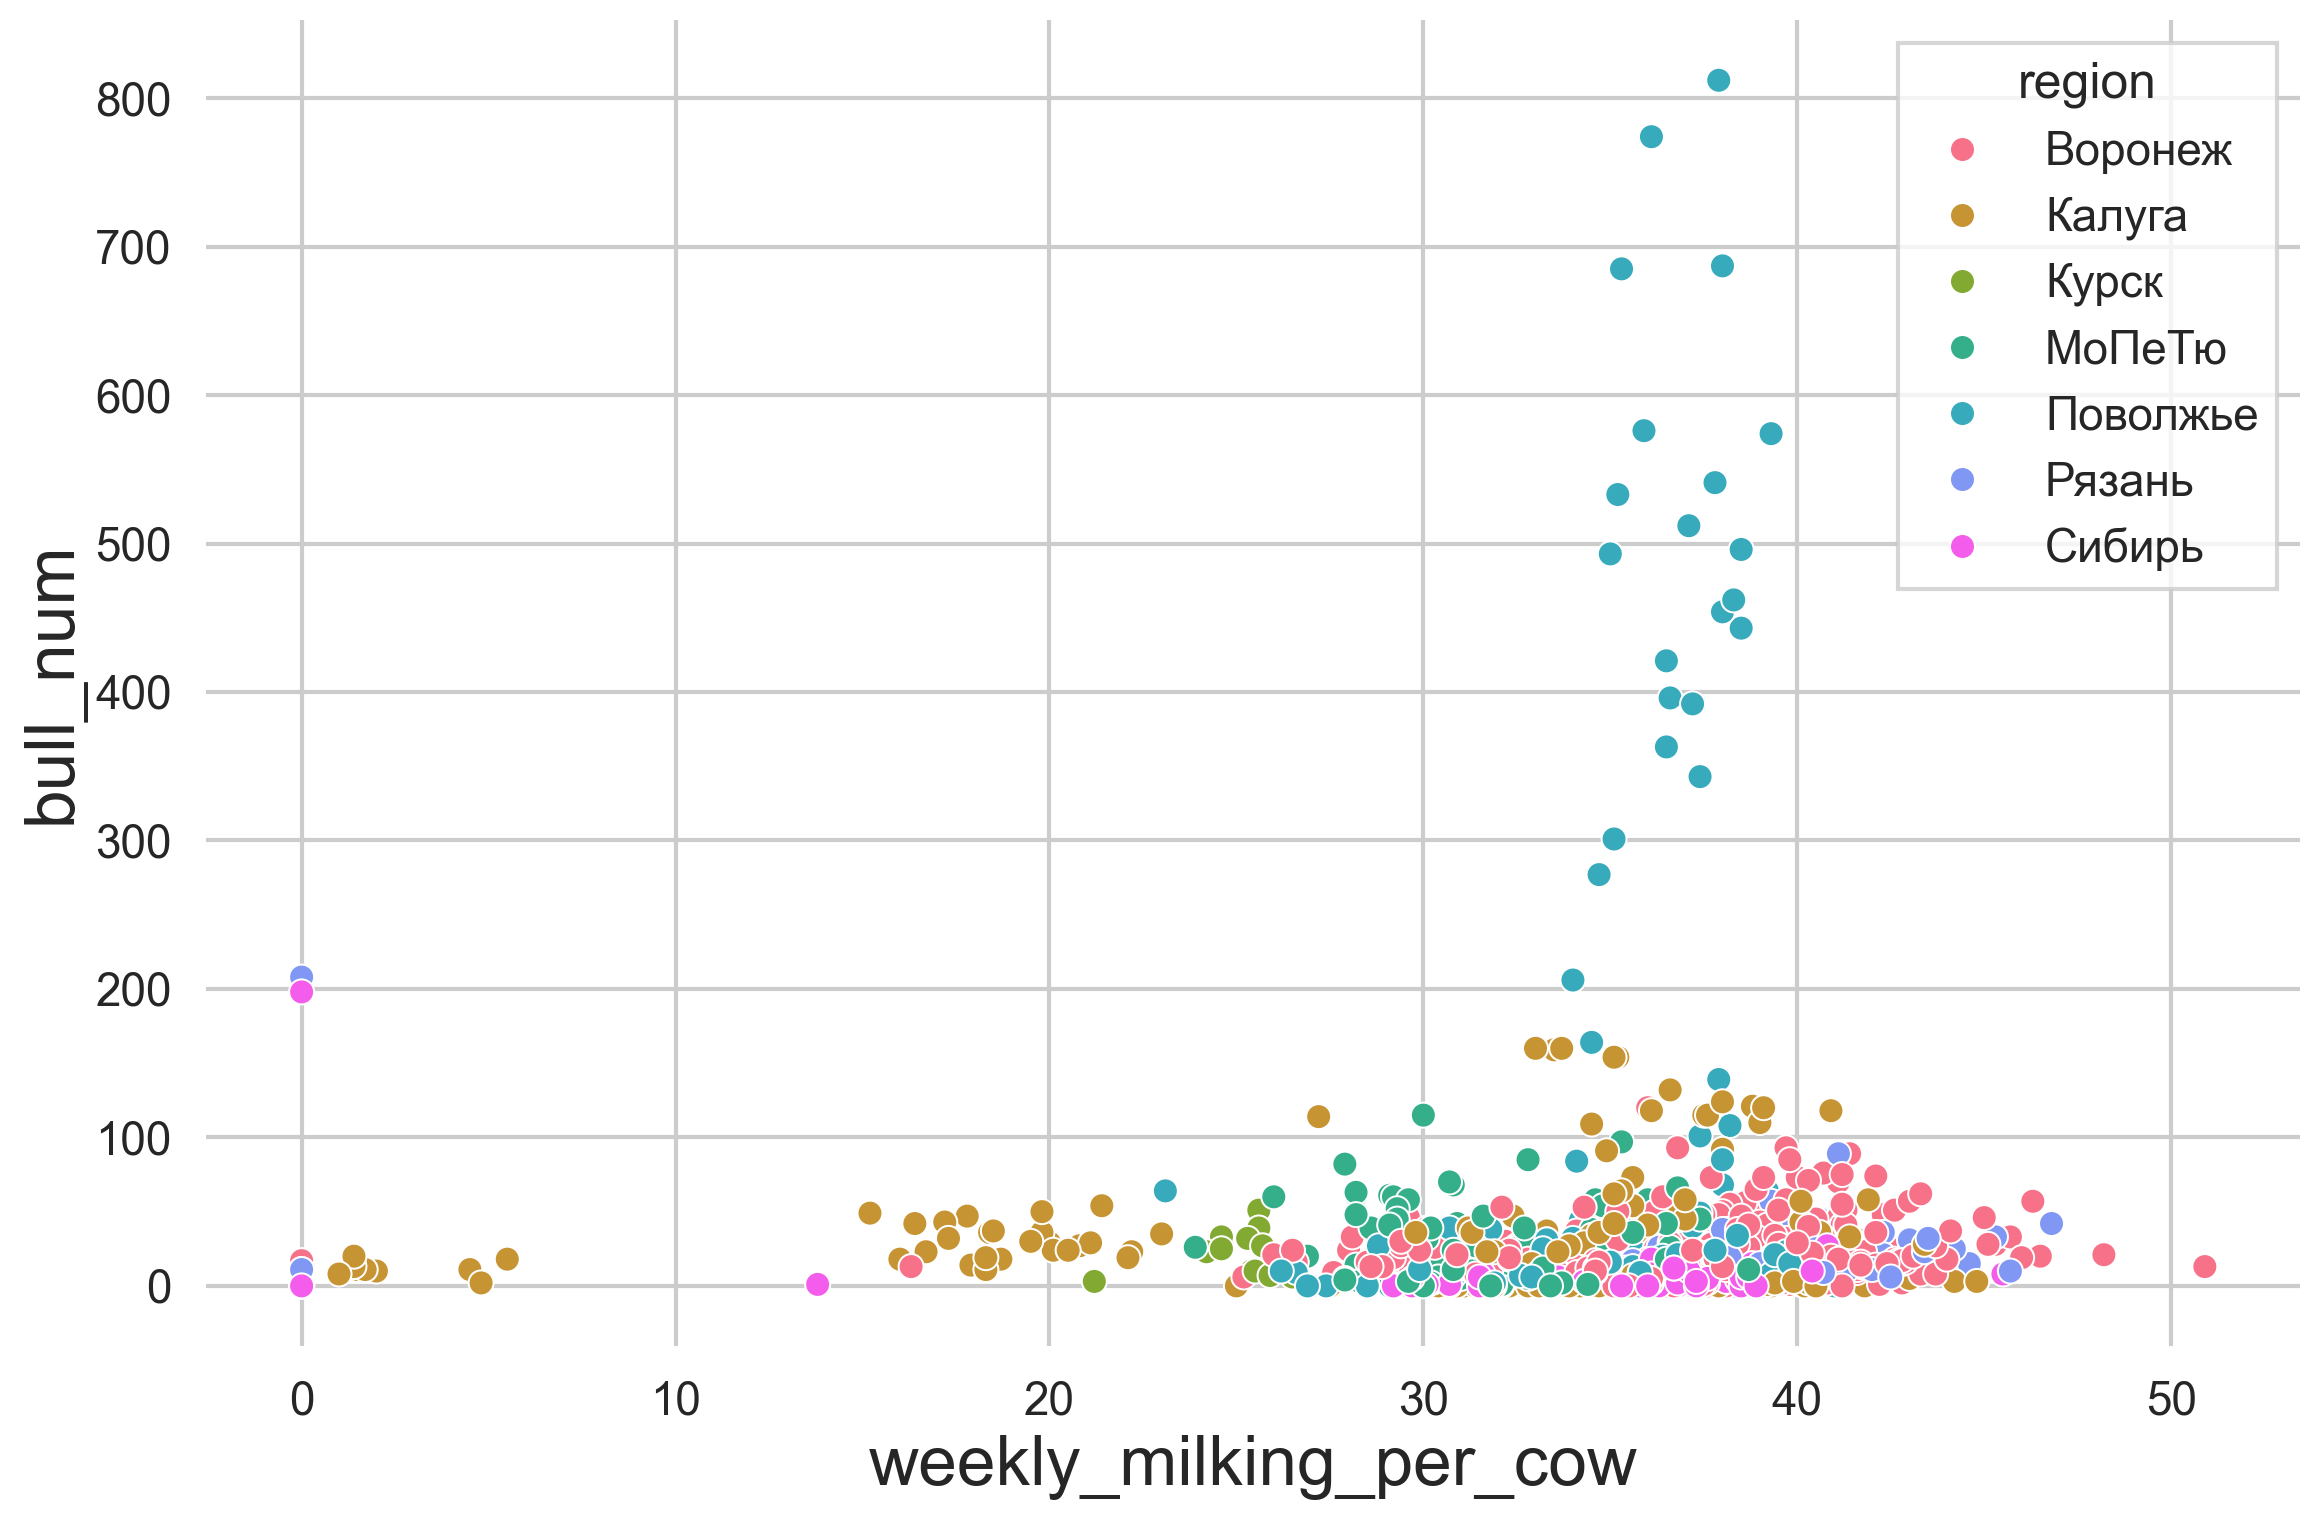

In [17]:
sns.scatterplot(data=production_indicators, x='weekly_milking_per_cow', y='bull_num', hue='region')

<Axes: xlabel='milk_cows', ylabel='bull_num'>

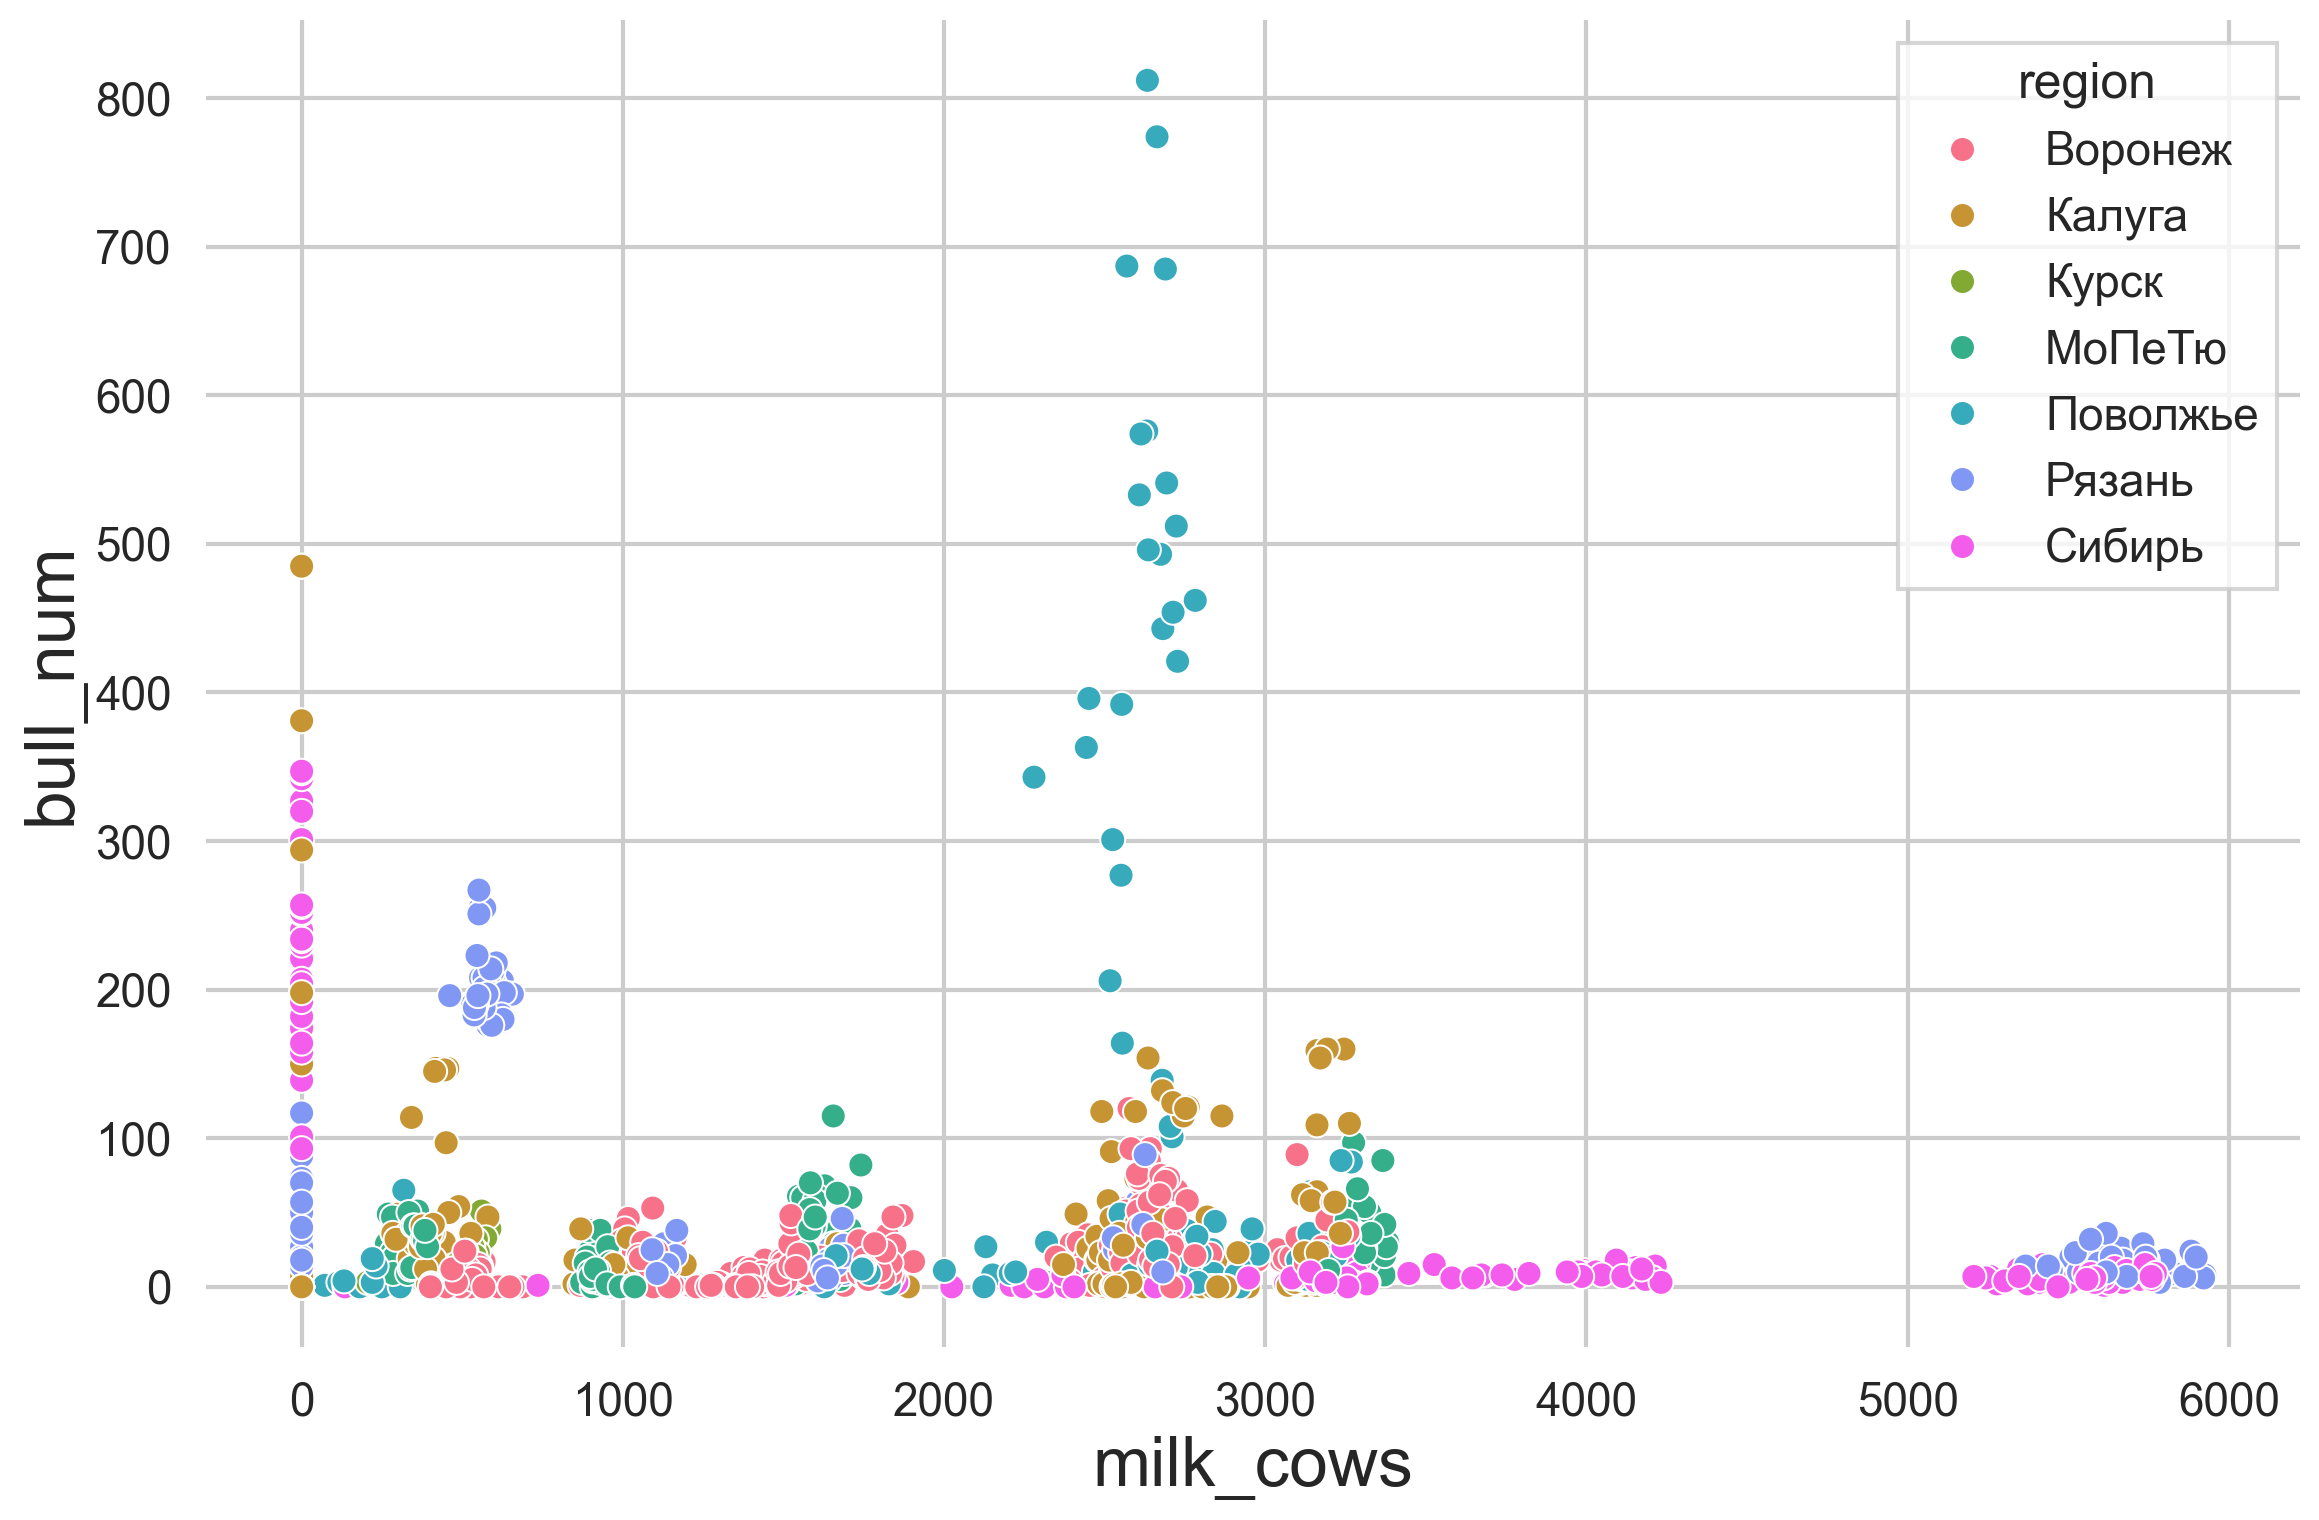

In [18]:
sns.scatterplot(data=production_indicators, x='milk_cows', y='bull_num', hue='region')

In [19]:
production_indicators[production_indicators['bull_num'] > 400]

date    region            prod_farm_name farm_type  \
971  2024-05-01  Поволжье    Северная Нива Башкирия        ЖК   
1026 2024-06-01  Поволжье    Северная Нива Башкирия        ЖК   
1081 2024-07-01  Поволжье    Северная Нива Башкирия        ЖК   
1135 2024-08-01  Поволжье    Северная Нива Башкирия        ЖК   
1190 2024-09-01  Поволжье    Северная Нива Башкирия        ЖК   
1245 2024-10-01  Поволжье    Северная Нива Башкирия        ЖК   
1299 2024-11-01  Поволжье    Северная Нива Башкирия        ЖК   
1353 2024-12-01  Поволжье    Северная Нива Башкирия        ЖК   
1407 2025-01-01  Поволжье    Северная Нива Башкирия        ЖК   
1461 2025-02-01  Поволжье    Северная Нива Башкирия        ЖК   
1474 2025-02-01    Сибирь  Сибирская Нива Маслянино        РМ   
1515 2025-03-01  Поволжье    Северная Нива Башкирия        ЖК   
1569 2025-04-01  Поволжье    Северная Нива Башкирия        ЖК   
1623 2025-05-01  Поволжье    Северная Нива Башкирия        ЖК   
1677 2025-06-01  Поволжье    Северная Нива Башкирия        ЖК   
1718 2025-07-01    Калуга     Калужская Нива Восток        ЖК   
1731 2025-07-01  Поволжье    Северная Нива Башкирия        ЖК   

               farm_name  cows_total  milk_cows  milk_cows_d0  milk_cows_d1  \
971   ЖК Семёно-Макарово      2922.0     2681.0         106.0        2418.0   
1026  ЖК Семёно-Макарово      2934.0     2713.0         138.0        2437.0   
1081  ЖК Семёно-Макарово      2980.0     2782.0          98.0        2513.0   
1135  ЖК Семёно-Макарово      3013.0     2727.0          65.0        2489.0   
1190  ЖК Семёно-Макарово      2979.0     2674.0         124.0        2379.0   
1245  ЖК Семёно-Макарово      2947.0     2608.0         102.0        2329.0   
1299  ЖК Семёно-Макарово      2990.0     2631.0         155.0        2136.0   
1353  ЖК Семёно-Макарово      2995.0     2689.0         103.0        2262.0   
1407  ЖК Семёно-Макарово      3007.0     2663.0         130.0        2195.0   
1461  ЖК Семёно-Макарово      2966.0     2633.0         113.0        2188.0   
1474         РМ Пеньково         0.0        0.0           0.0           0.0   
1515  ЖК Семёно-Макарово      2891.0     2569.0         103.0        2151.0   
1569  ЖК Семёно-Макарово      2925.0     2613.0         143.0        1142.0   
1623  ЖК Семёно-Макарово      2927.0     2636.0          95.0        1188.0   
1677  ЖК Семёно-Макарово      2930.0     2693.0         123.0        1194.0   
1718          РМ Детчино         0.0        0.0           0.0           0.0   
1731  ЖК Семёно-Макарово      2939.0     2723.0         120.0        1211.0   

      milk_cows_d2  milk_cows_d3  weekly_milking_per_cow  gross_milk_yield  \
971          157.0           0.0                    38.5          104396.0   
1026         138.0           0.0                    38.0           99101.0   
1081         171.0           0.0                    38.3          102548.0   
1135         173.0           0.0                    36.5           97056.0   
1190         171.0           0.0                    35.0           91219.0   
1245         177.0           0.0                    35.2           91909.0   
1299         340.0           0.0                    35.9           92854.0   
1353         324.0           0.0                    35.3           95081.0   
1407         338.0           0.0                    36.1           94758.0   
1461           0.0         332.0                    37.9           97927.0   
1474           0.0           0.0                     NaN               NaN   
1515           0.0         315.0                    38.0           97485.0   
1569         989.0         339.0                    39.3           99768.0   
1623        1010.0         343.0                    38.5           99911.0   
1677        1053.0         323.0                    37.8          102046.0   
1718           0.0           0.0                     NaN               NaN   
1731        1392.0           0.0                    37.1           99274.0   

      cow_re

<Axes: xlabel='weekly_milking_per_cow', ylabel='gross_milk_yield'>

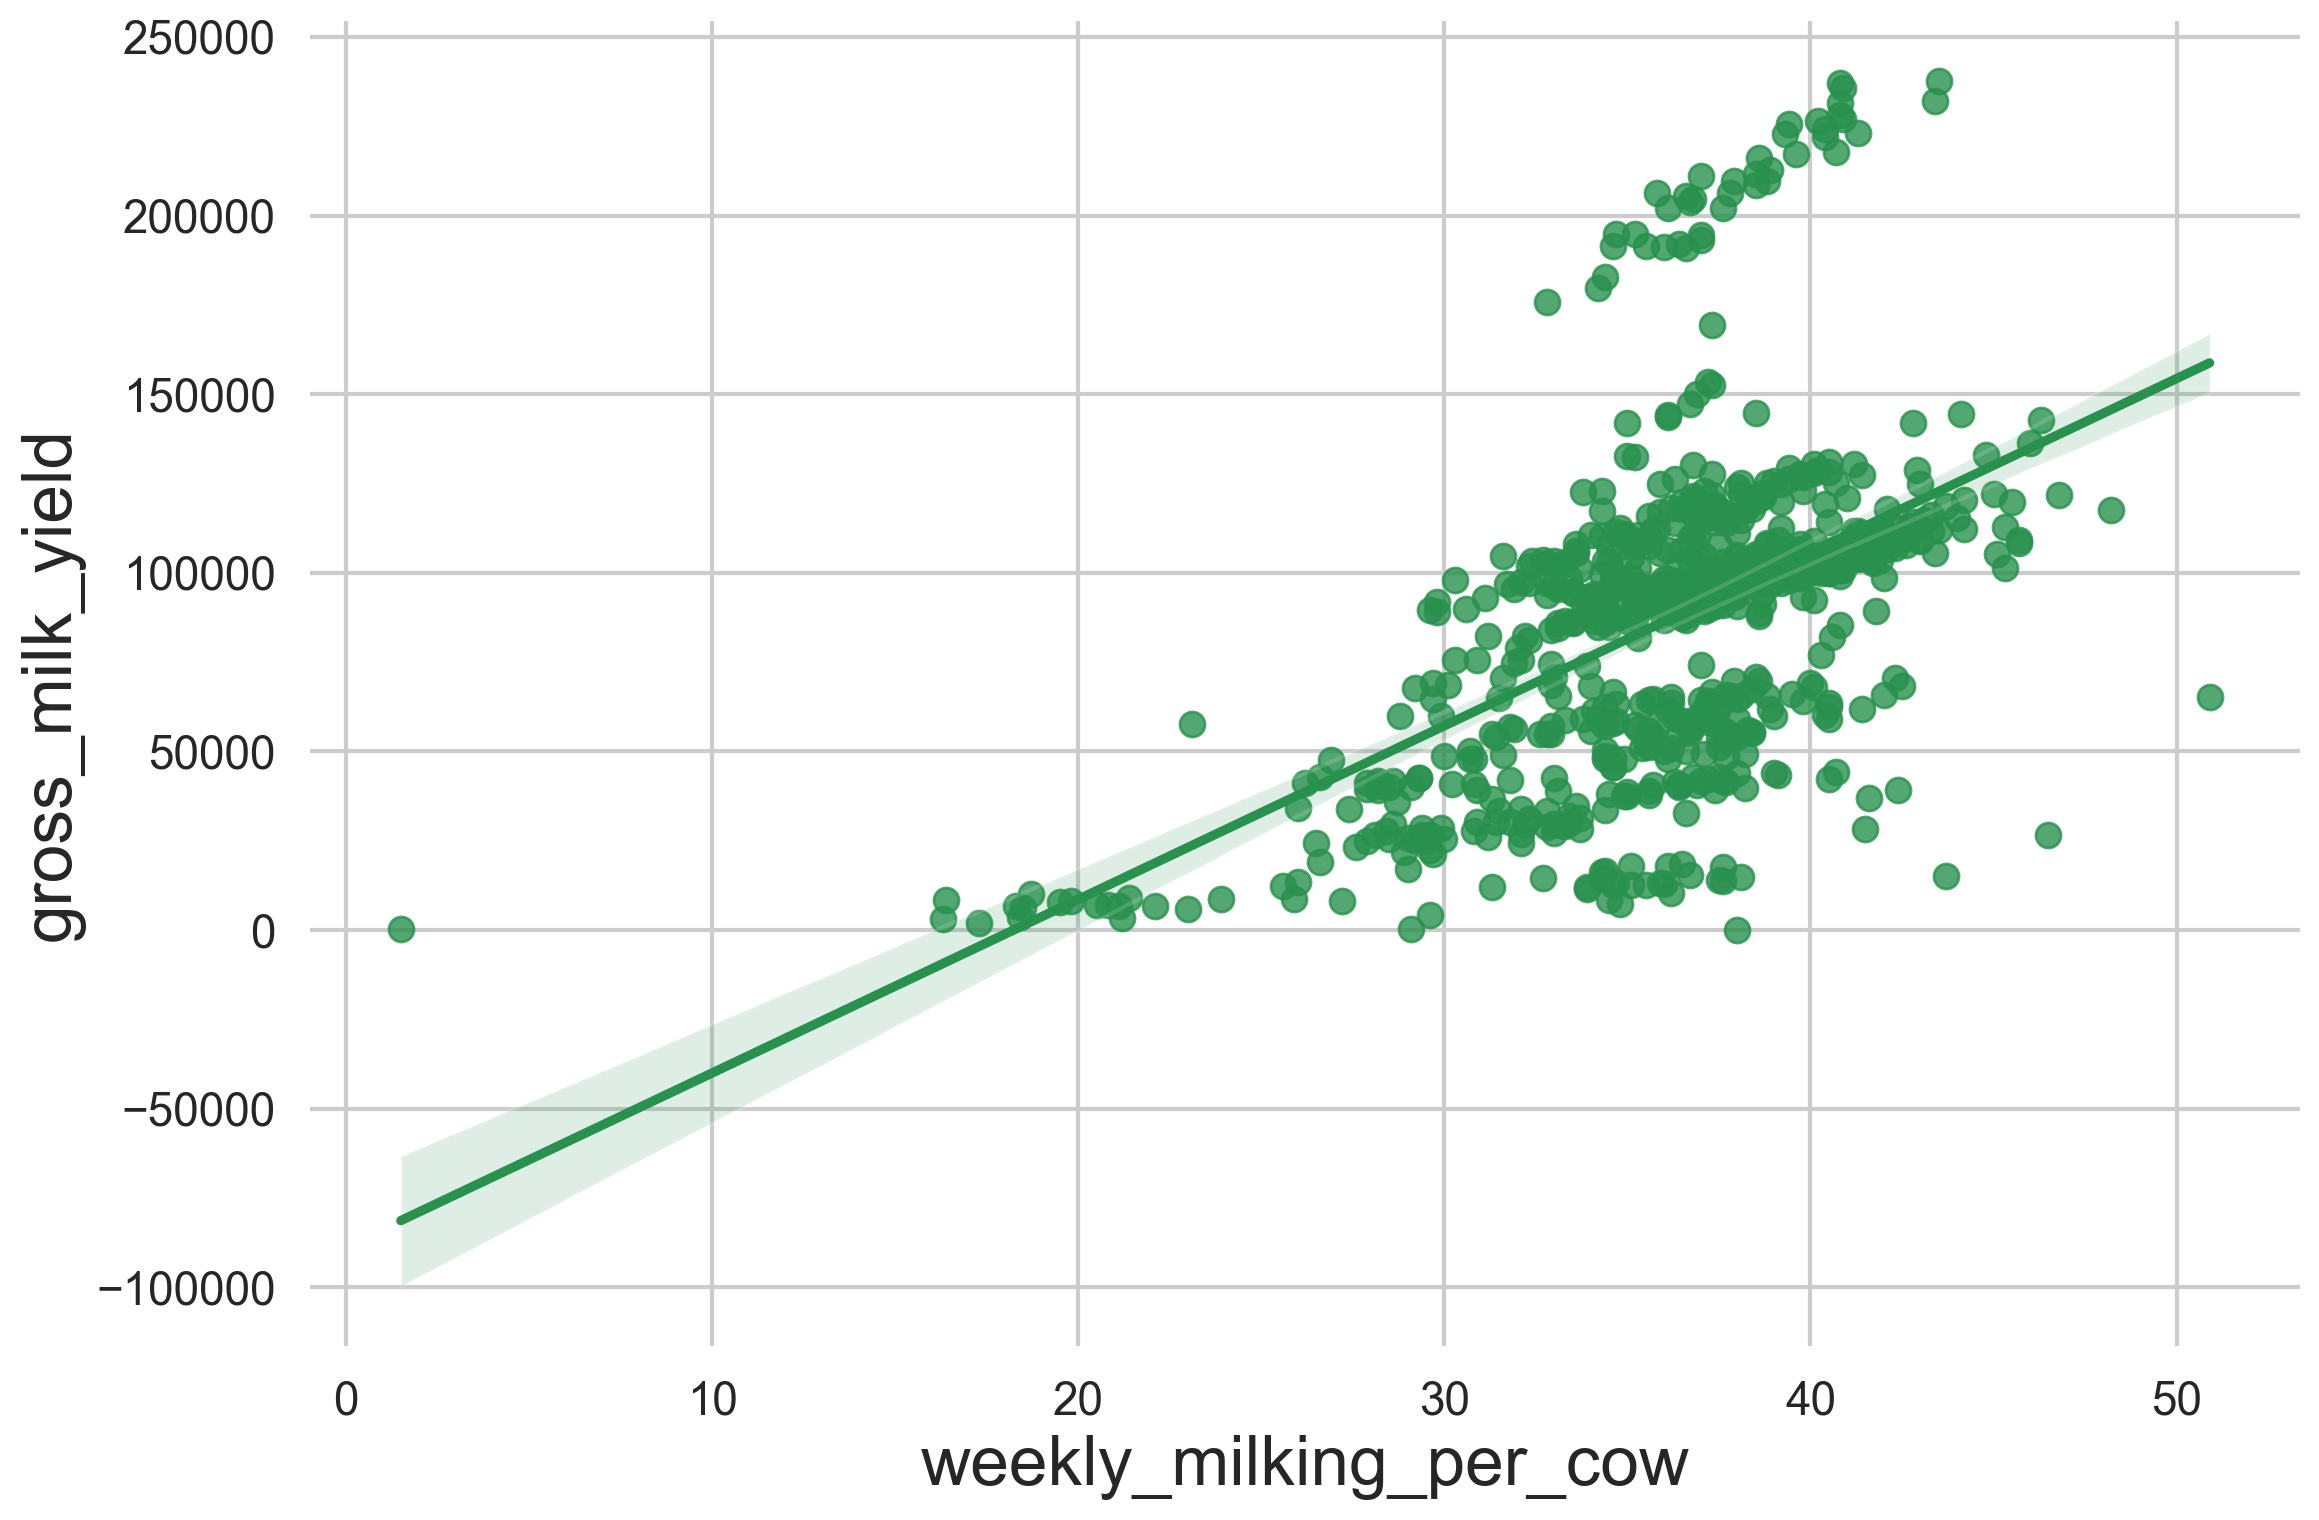

In [20]:
sns.regplot(data=production_indicators, x='weekly_milking_per_cow', y='gross_milk_yield')

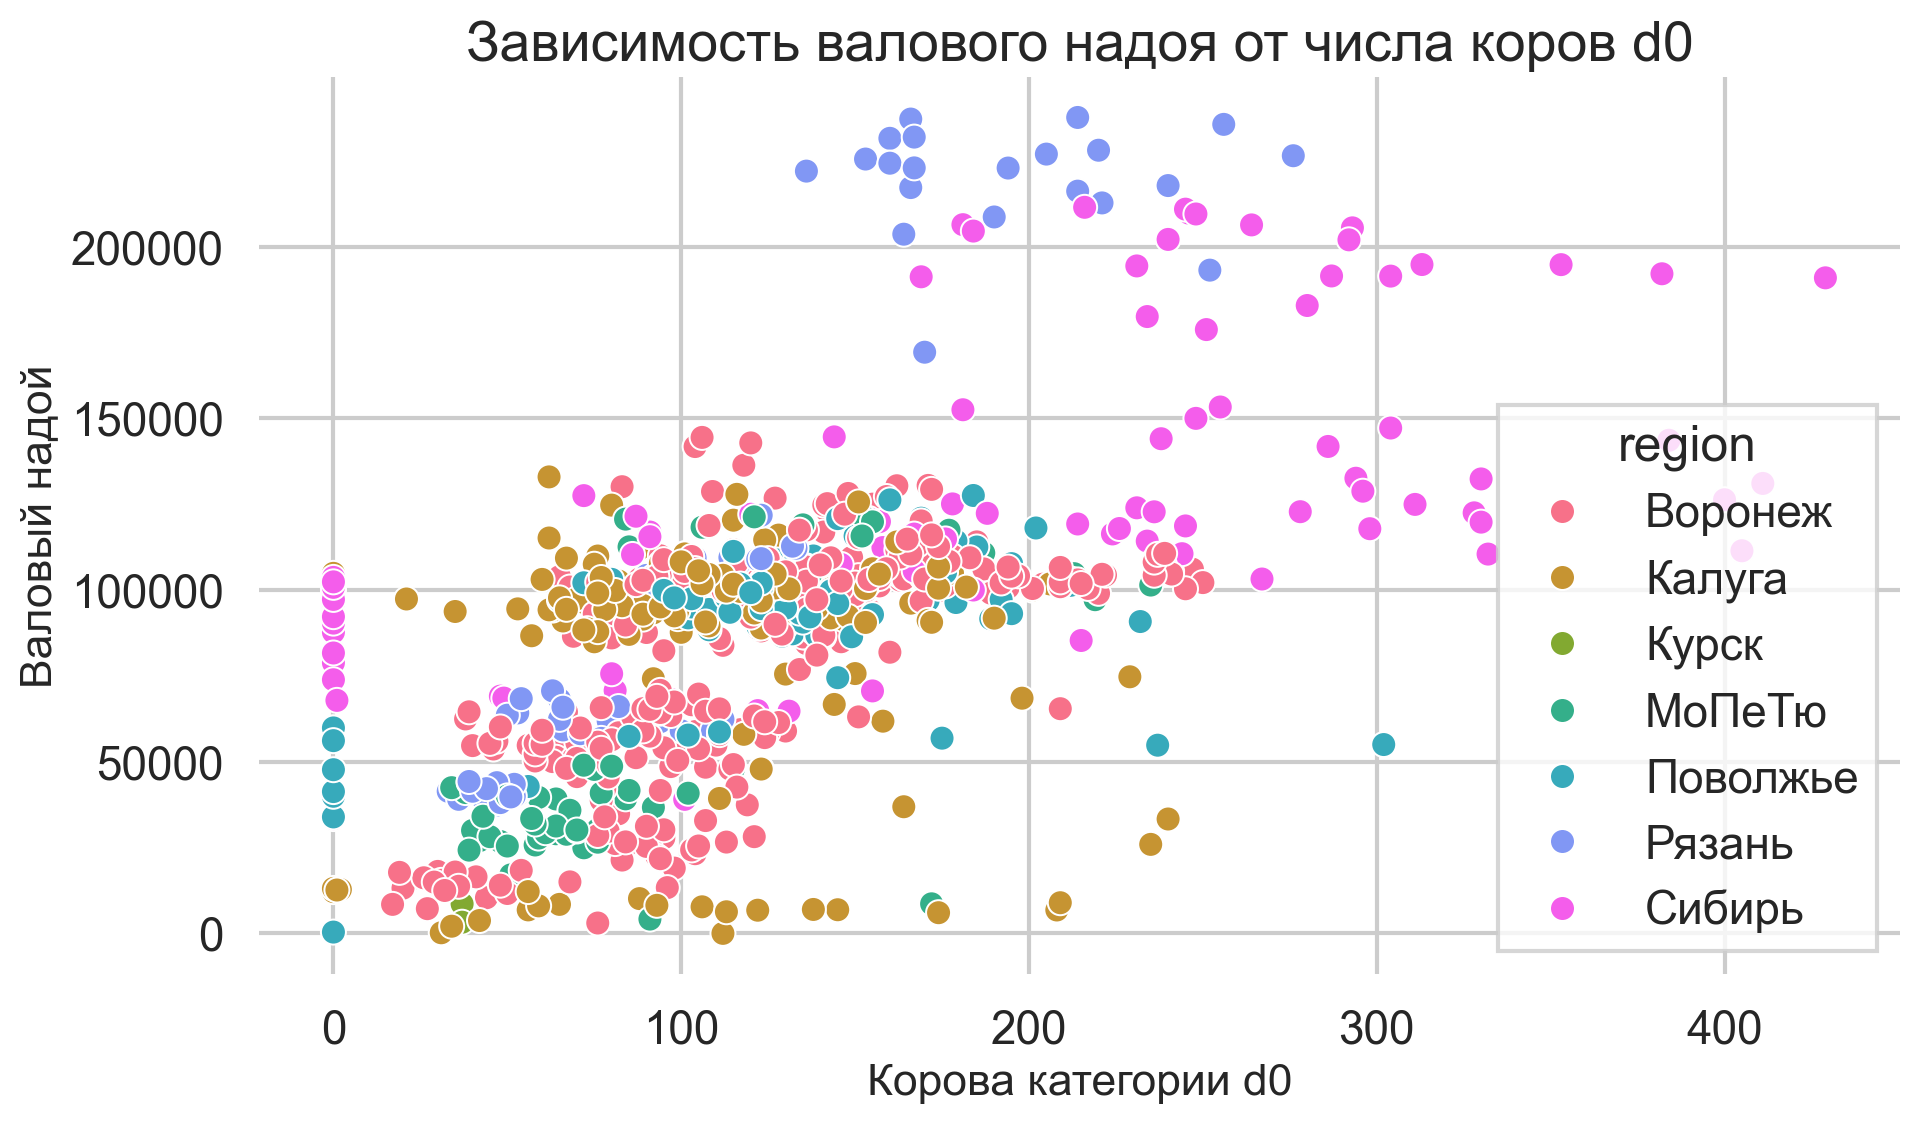

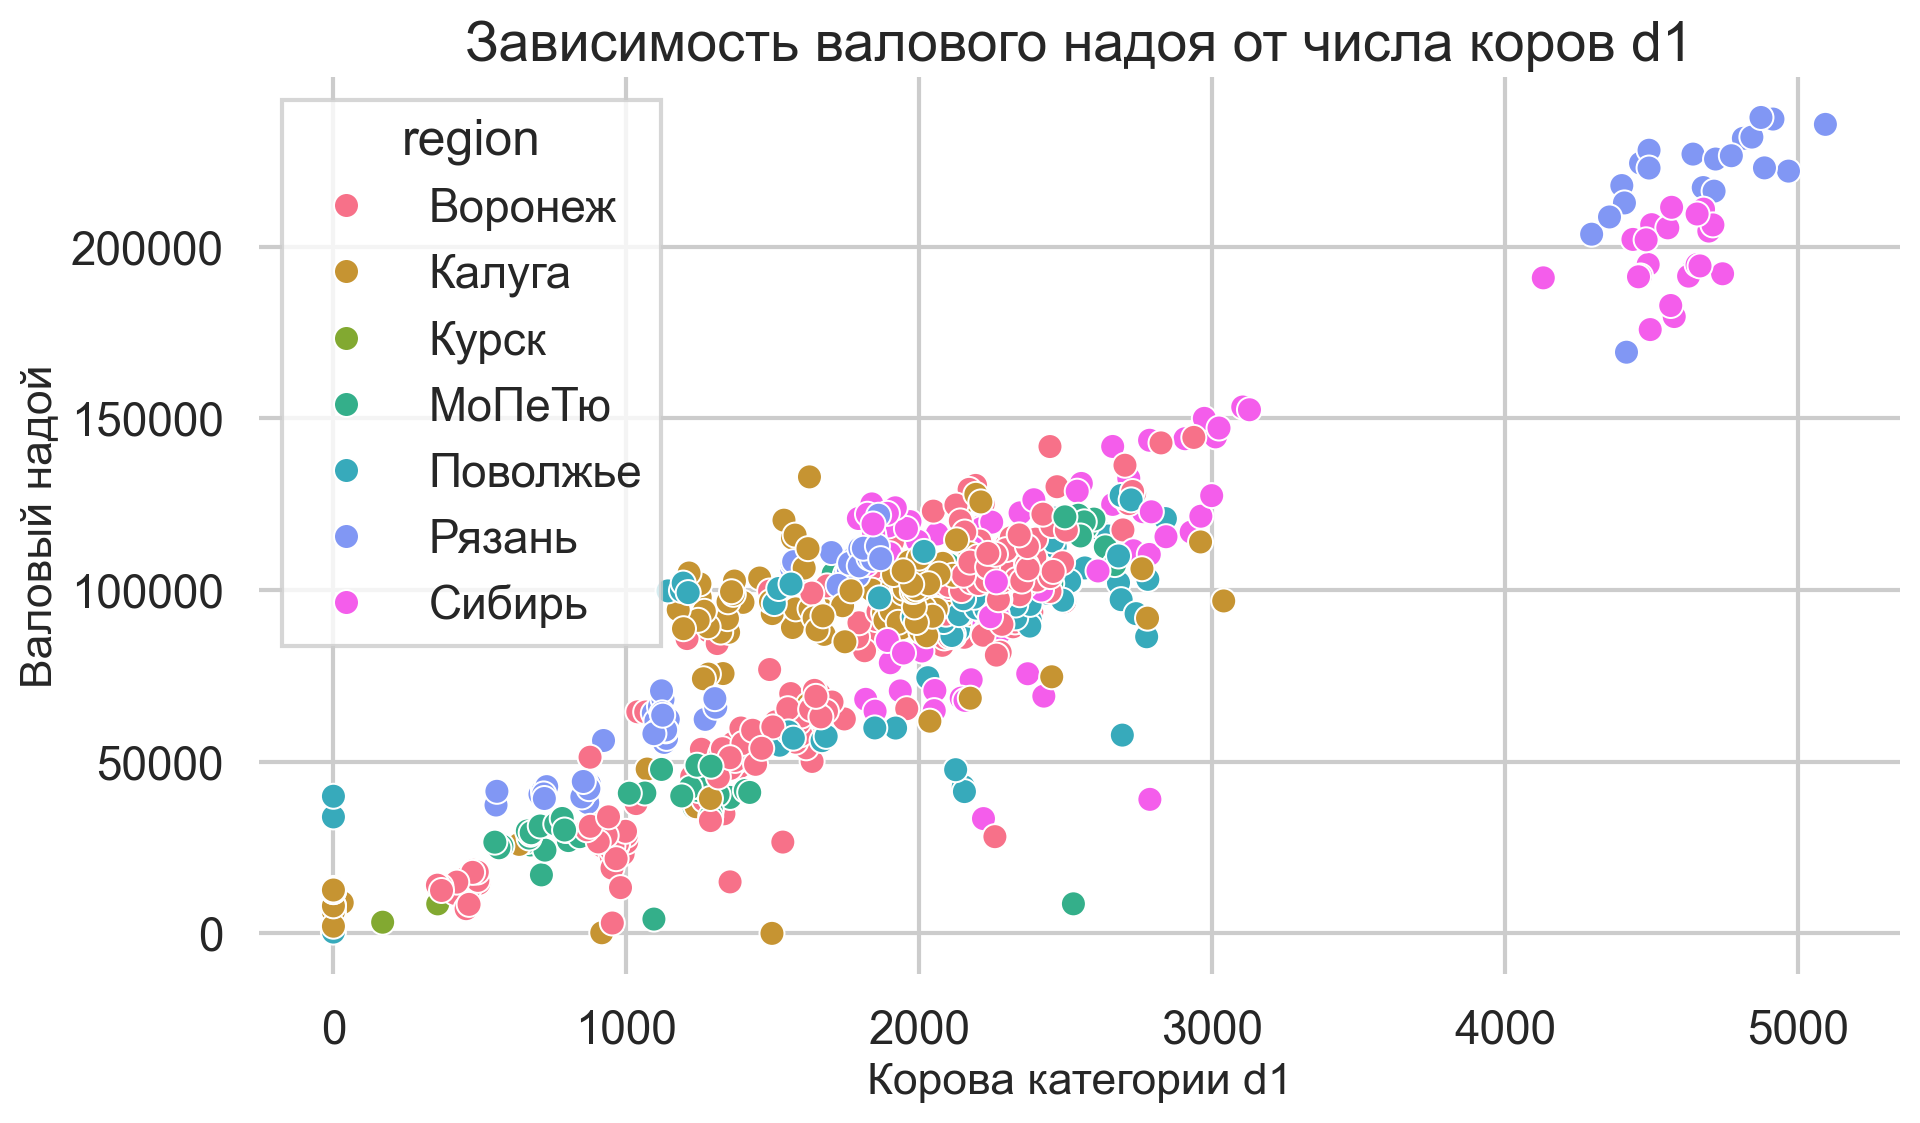

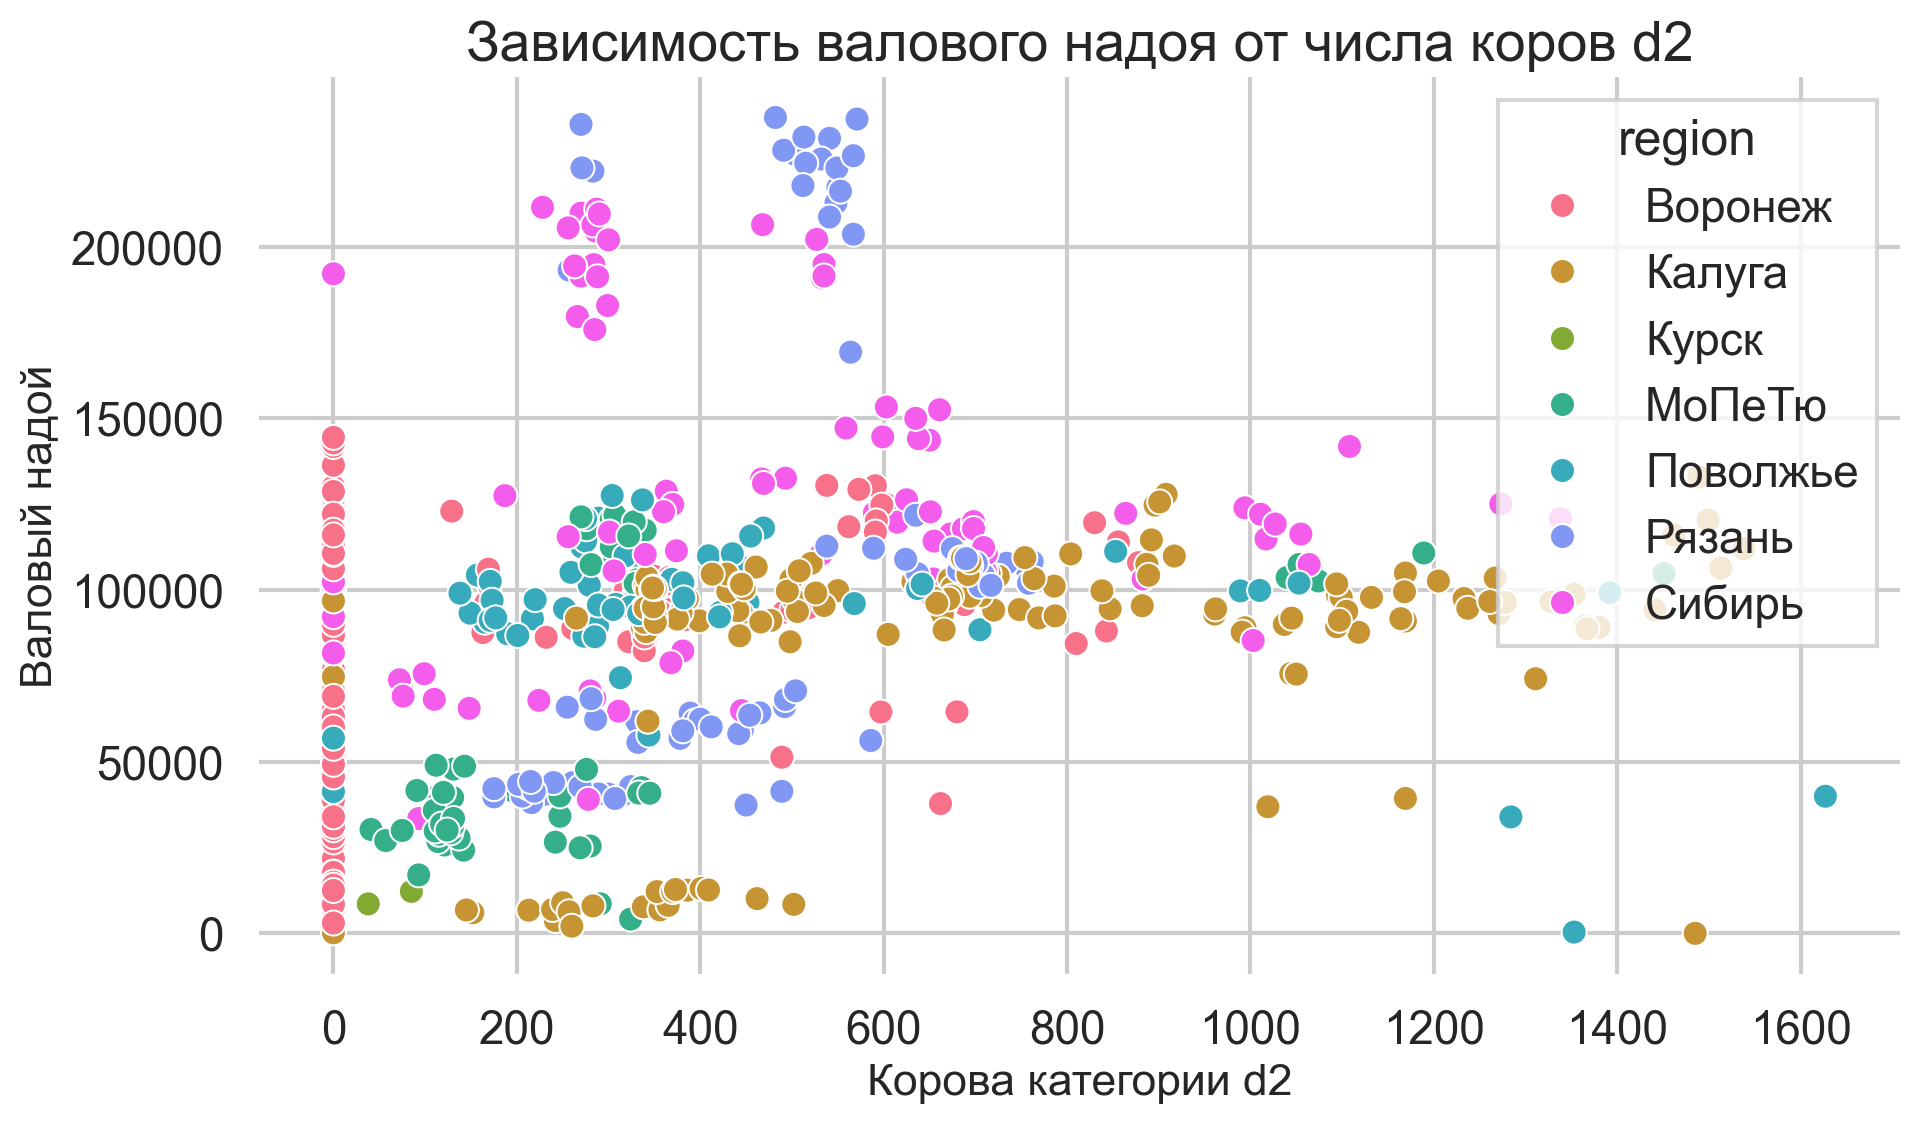

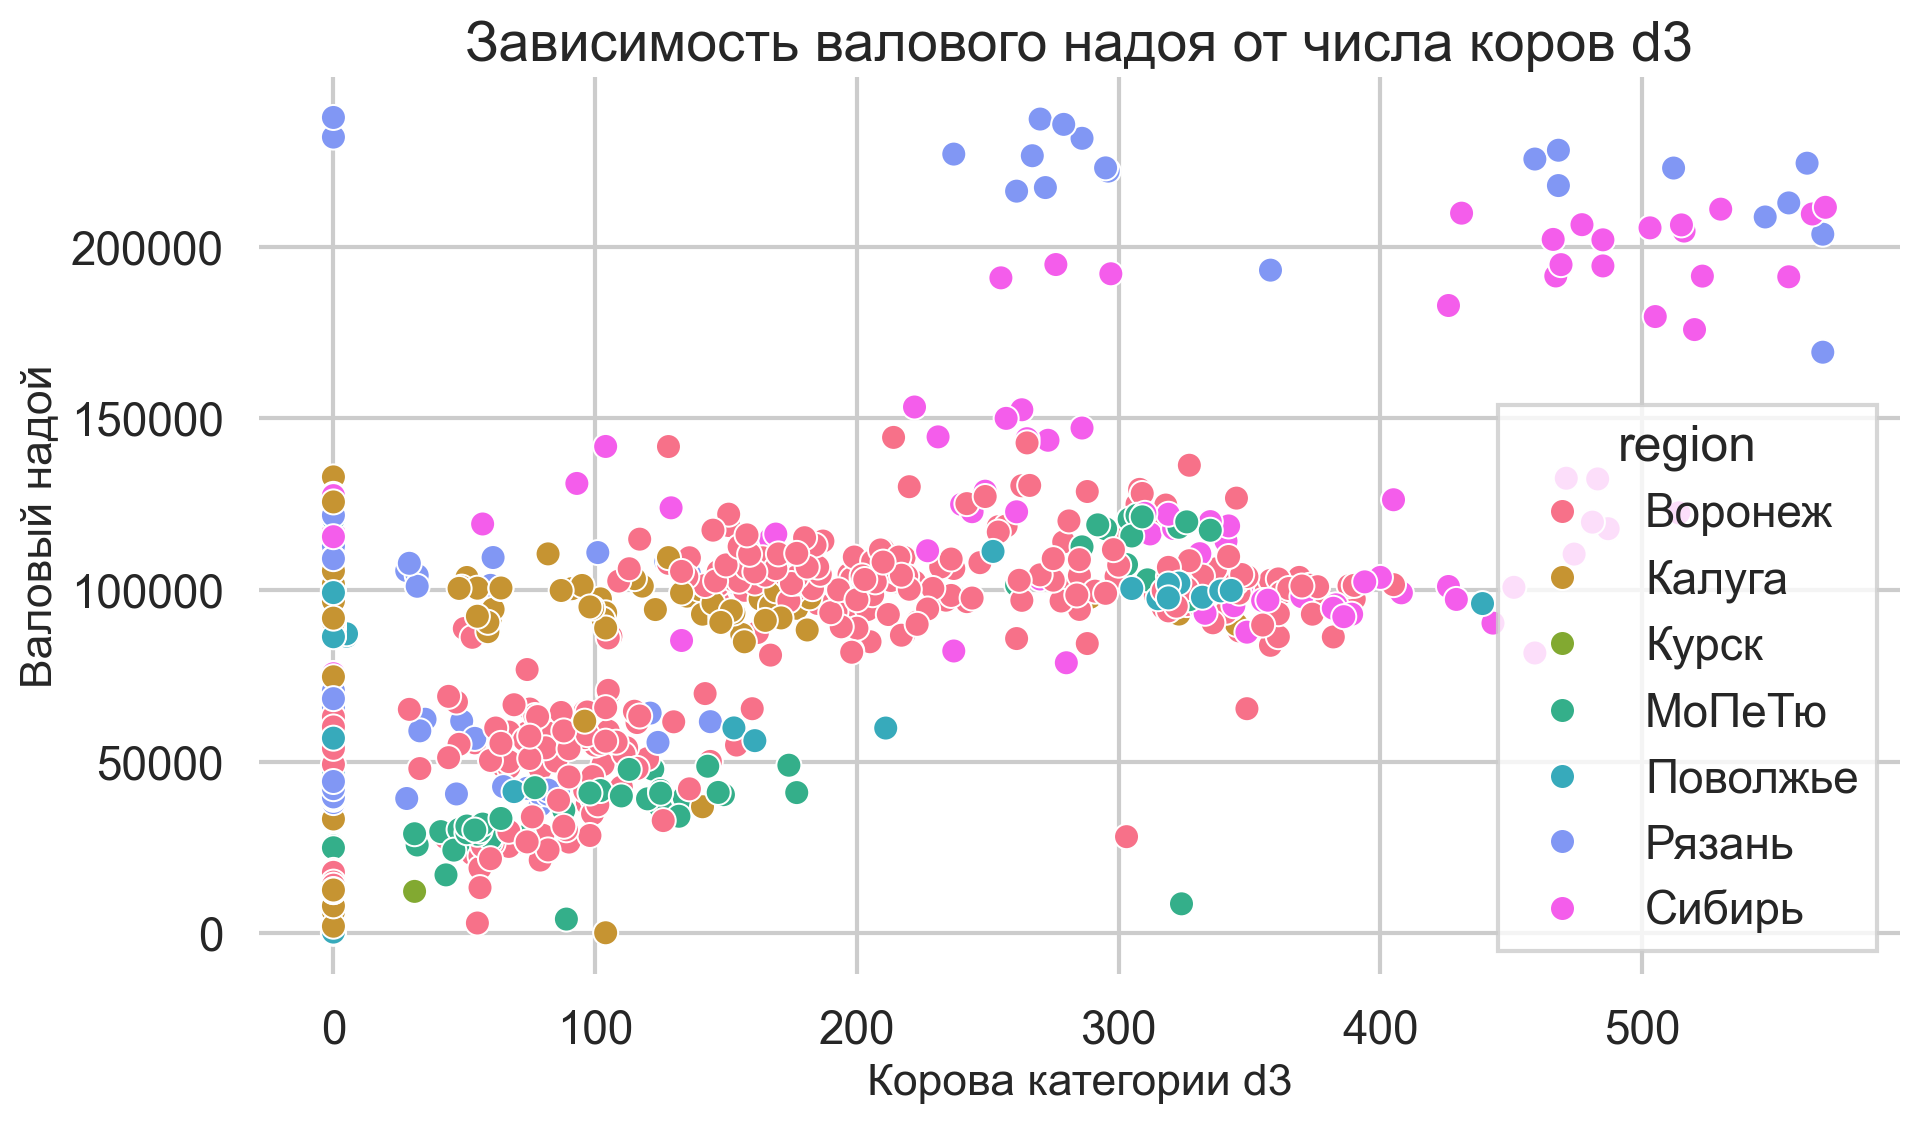

In [44]:
for i in ['d0', 'd1', 'd2', 'd3']:
    fig = plt.figure(figsize=(10,6))
    col_name = f'milk_cows_{i}'
    sns.scatterplot(data=production_indicators, x=col_name, y='gross_milk_yield', hue='region')
    plt.ylabel('Валовый надой', fontsize=16)
    plt.xlabel(f'Корова категории {i}', fontsize=16)
    plt.title(f'Зависимость валового надоя от числа коров {i}', fontsize=20)
    if (i == 'd1'):
        plt.savefig('val_d1.png')
    plt.tight_layout()
    plt.show()

In [22]:
farm_region = round(production_indicators.groupby('region')['farm_name'].count() / production_indicators['farm_name'].nunique(), 3)
farm_region

region
Воронеж     12.271
Калуга       6.153
Курск        0.254
МоПеТю       2.169
Поволжье     2.254
Рязань       3.254
Сибирь       3.254
Name: farm_name, dtype: float64

In [23]:
farm_region = round(herd_metrics.groupby('region')['farm_name'].count() / herd_metrics['farm_name'].nunique(), 3)
farm_region

region
Воронеж     23.362
Калуга      12.750
Курск        1.062
МоПеТю       3.350
Поволжье     2.912
Рязань       5.850
Сибирь       4.475
Name: farm_name, dtype: float64

In [24]:
herd_metrics.bac_contam.mean()

np.float64(41.121657822036674)

<Axes: xlabel='bac_contam', ylabel='Count'>

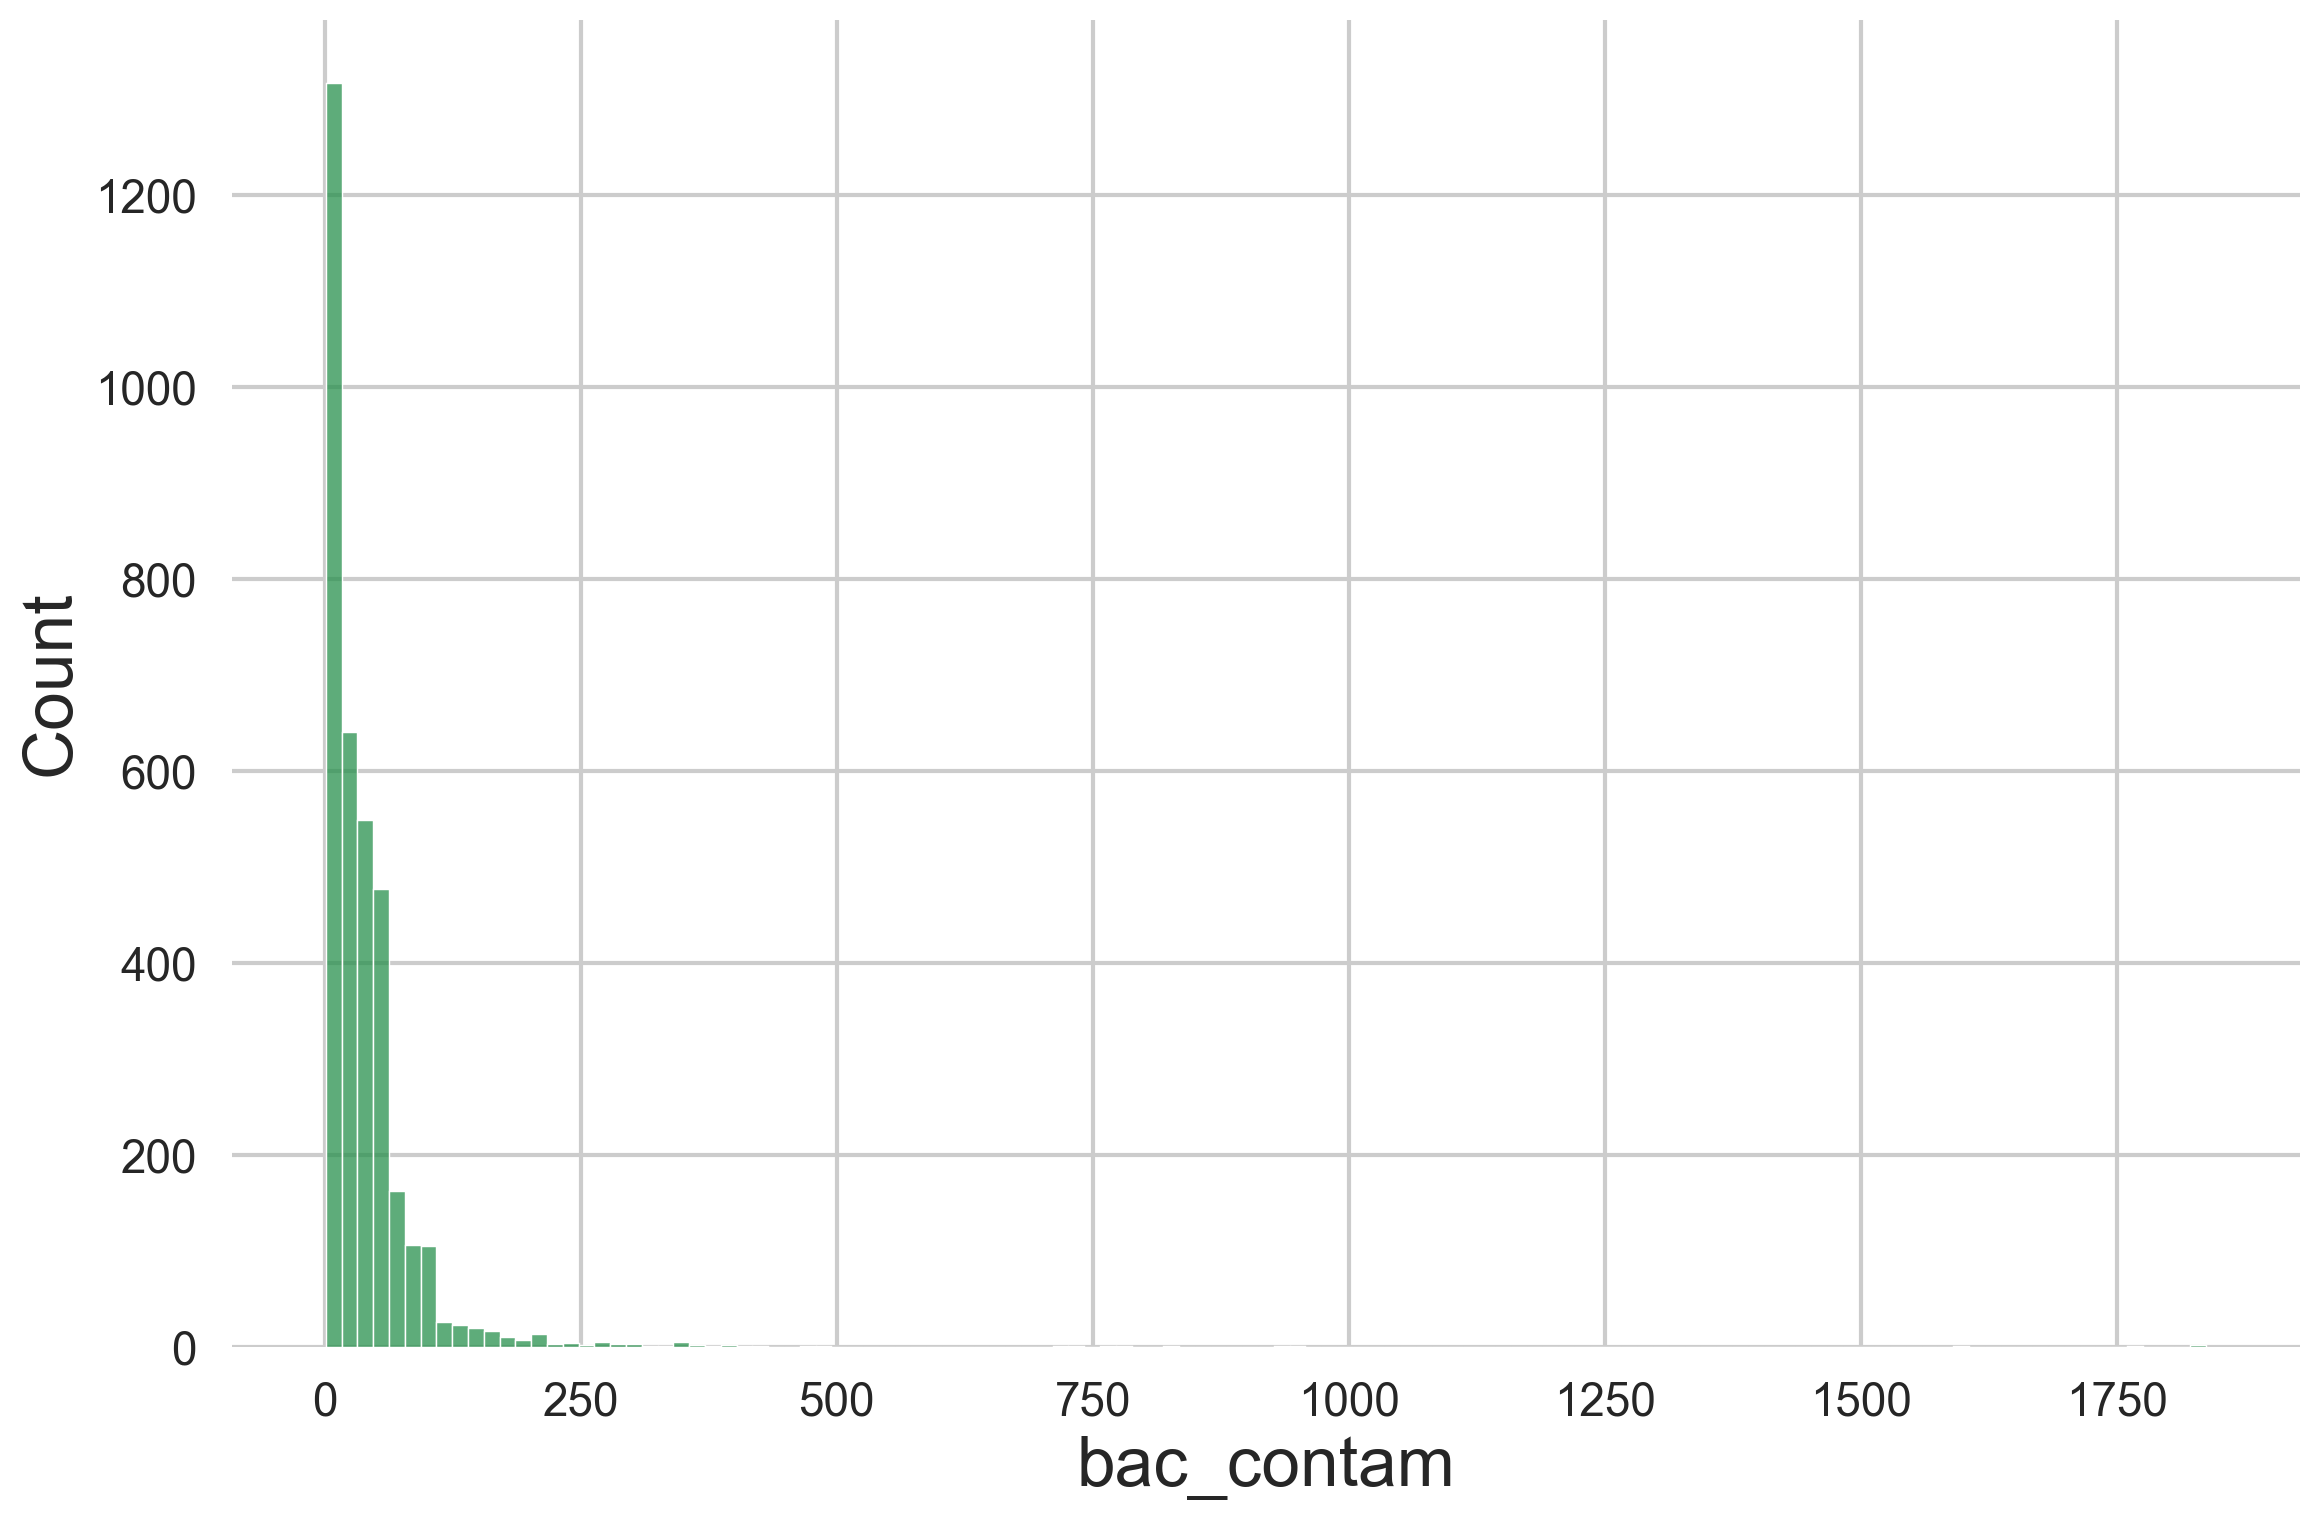

In [25]:
sns.histplot(data=herd_metrics, x='bac_contam')

In [26]:
asd = round(herd_metrics.groupby('region')[['milk_fat', 'milk_protein']].mean().reset_index(), 4)
asd

region  milk_fat  milk_protein
0   Воронеж    4.0943        3.5222
1    Калуга    3.9785        3.5540
2     Курск    3.8846        3.5231
3    МоПеТю    4.0218        3.3782
4  Поволжье    3.8983        3.4025
5    Рязань    3.8097        3.4328
6    Сибирь    3.7673        3.3388

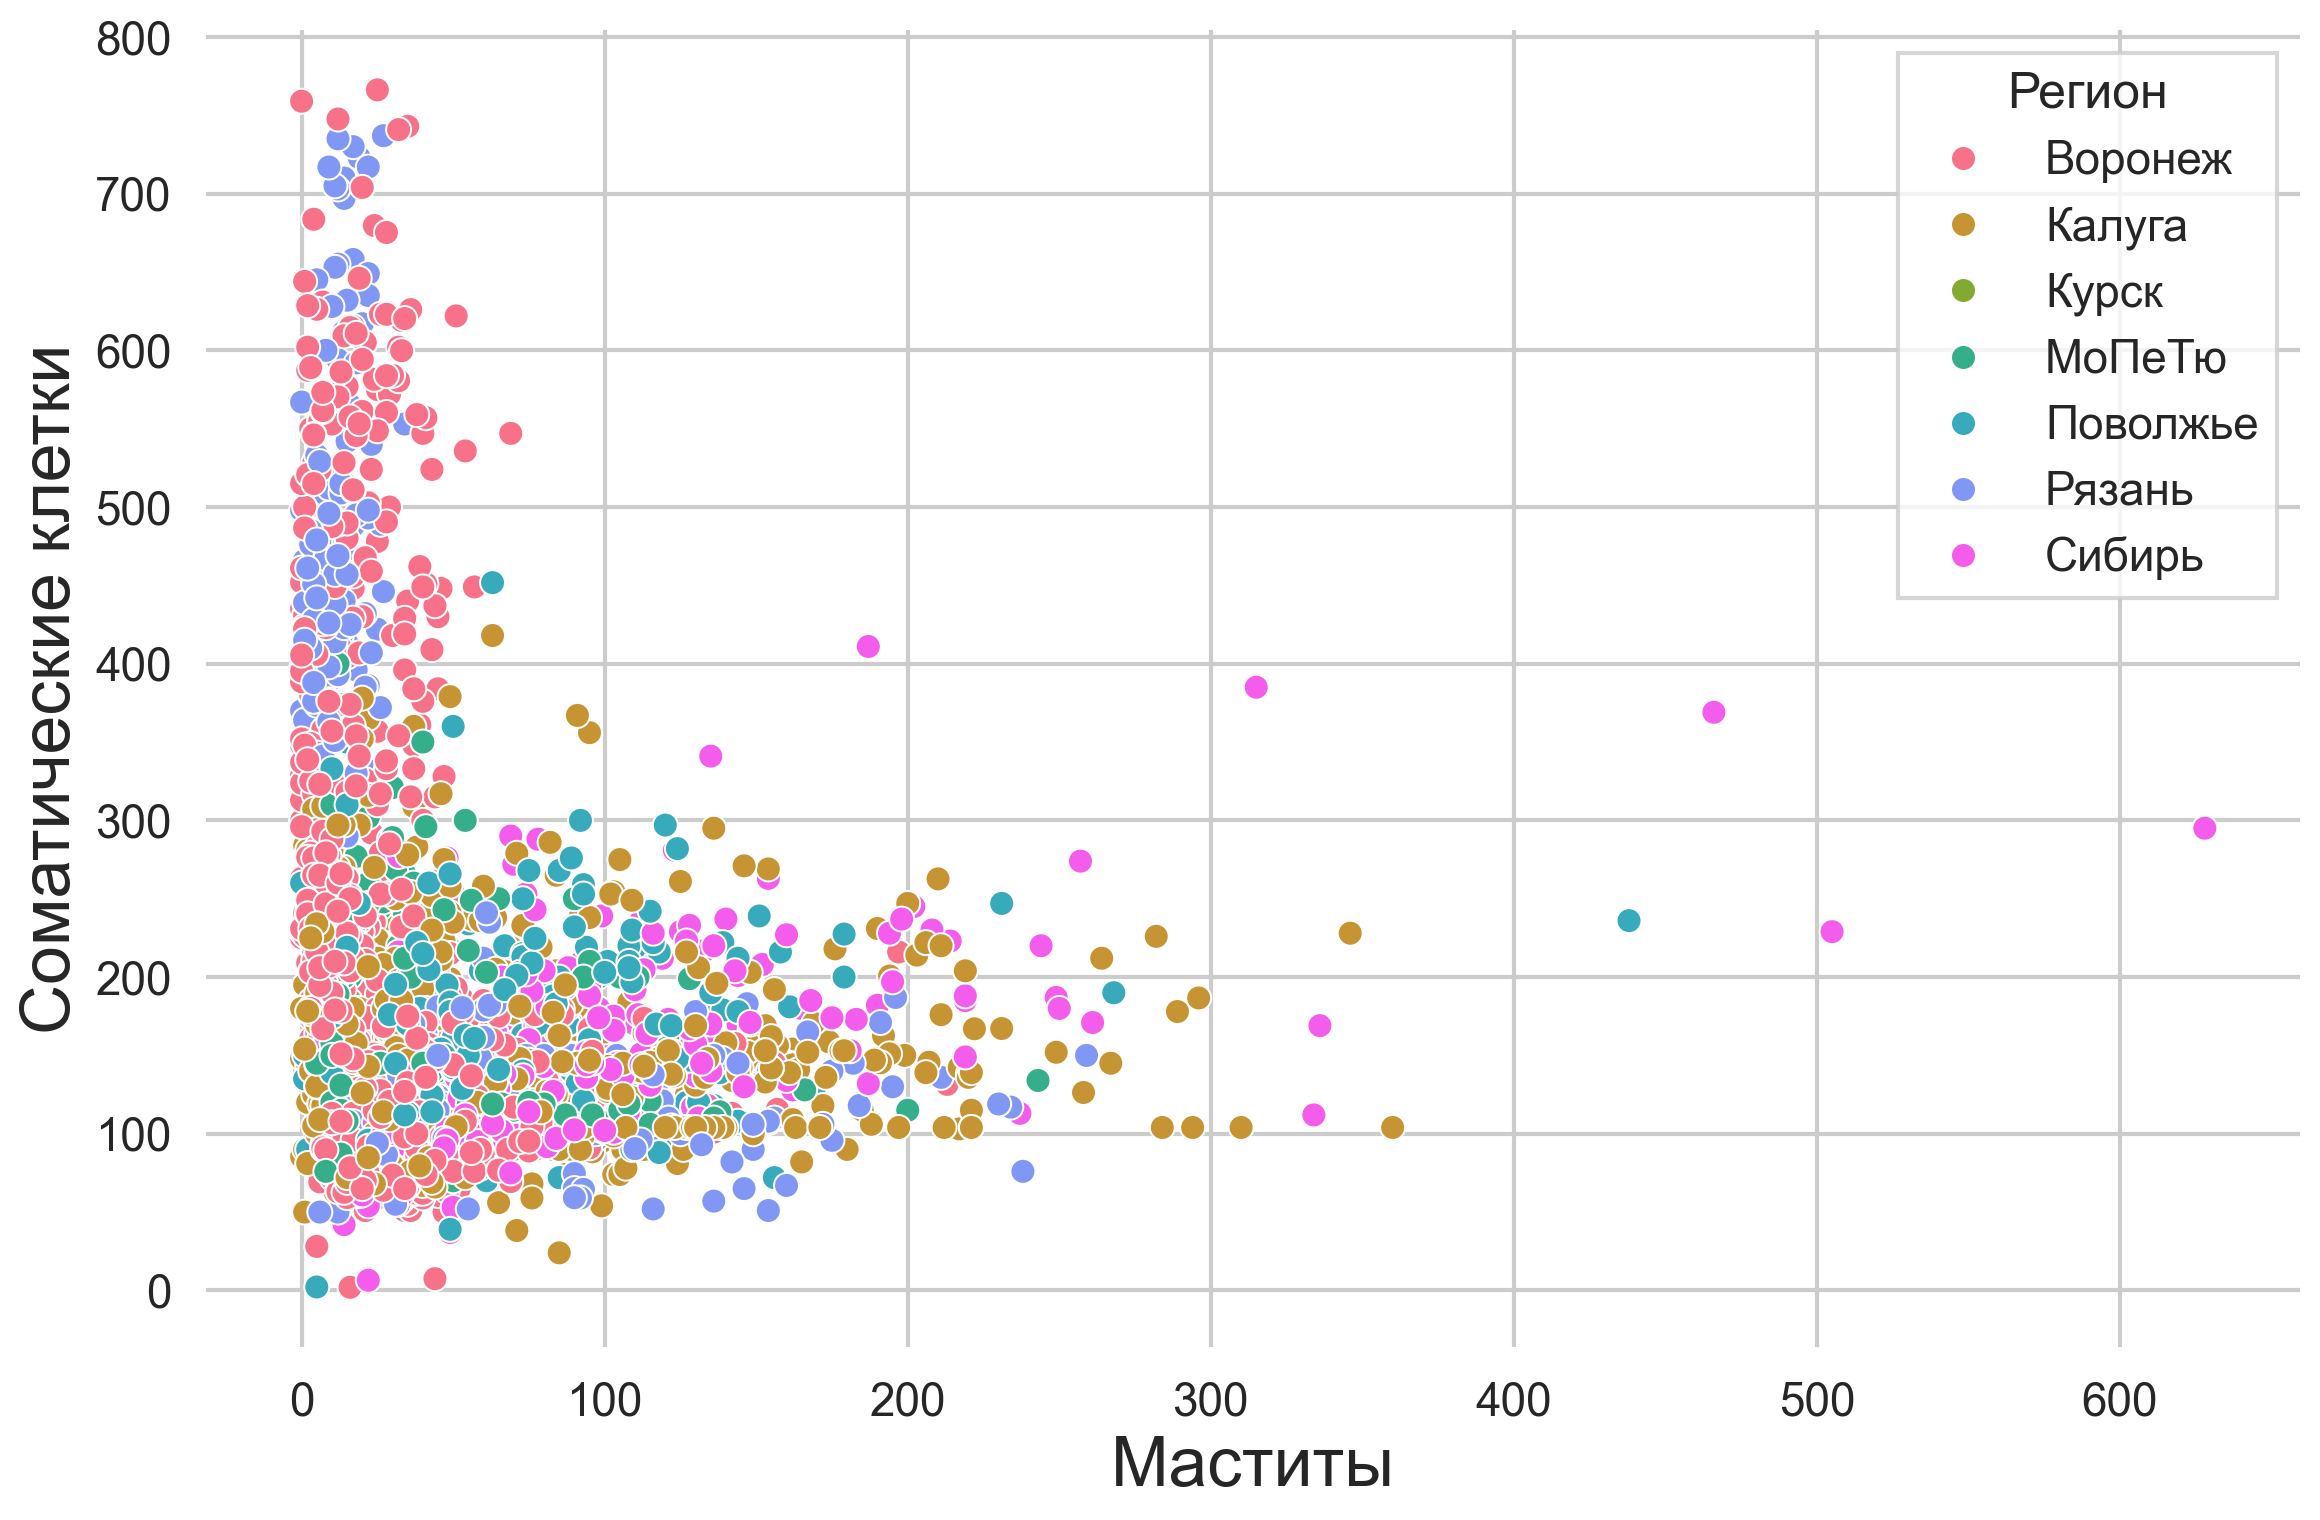

In [51]:
herd_metrics['cow_mastits'] = pd.to_numeric(herd_metrics['cow_mastits'], errors='coerce')
herd_metrics['somatic_cells'] = pd.to_numeric(herd_metrics['somatic_cells'], errors='coerce')
sns.scatterplot(data=herd_metrics, x='cow_mastits', y='somatic_cells', hue='region')
plt.xlabel('Маститы')
plt.ylabel('Соматические клетки')
plt.legend(title='Регион')
plt.savefig('val_d1.png')

<Axes: xlabel='cow_mastits', ylabel='somatic_cells'>

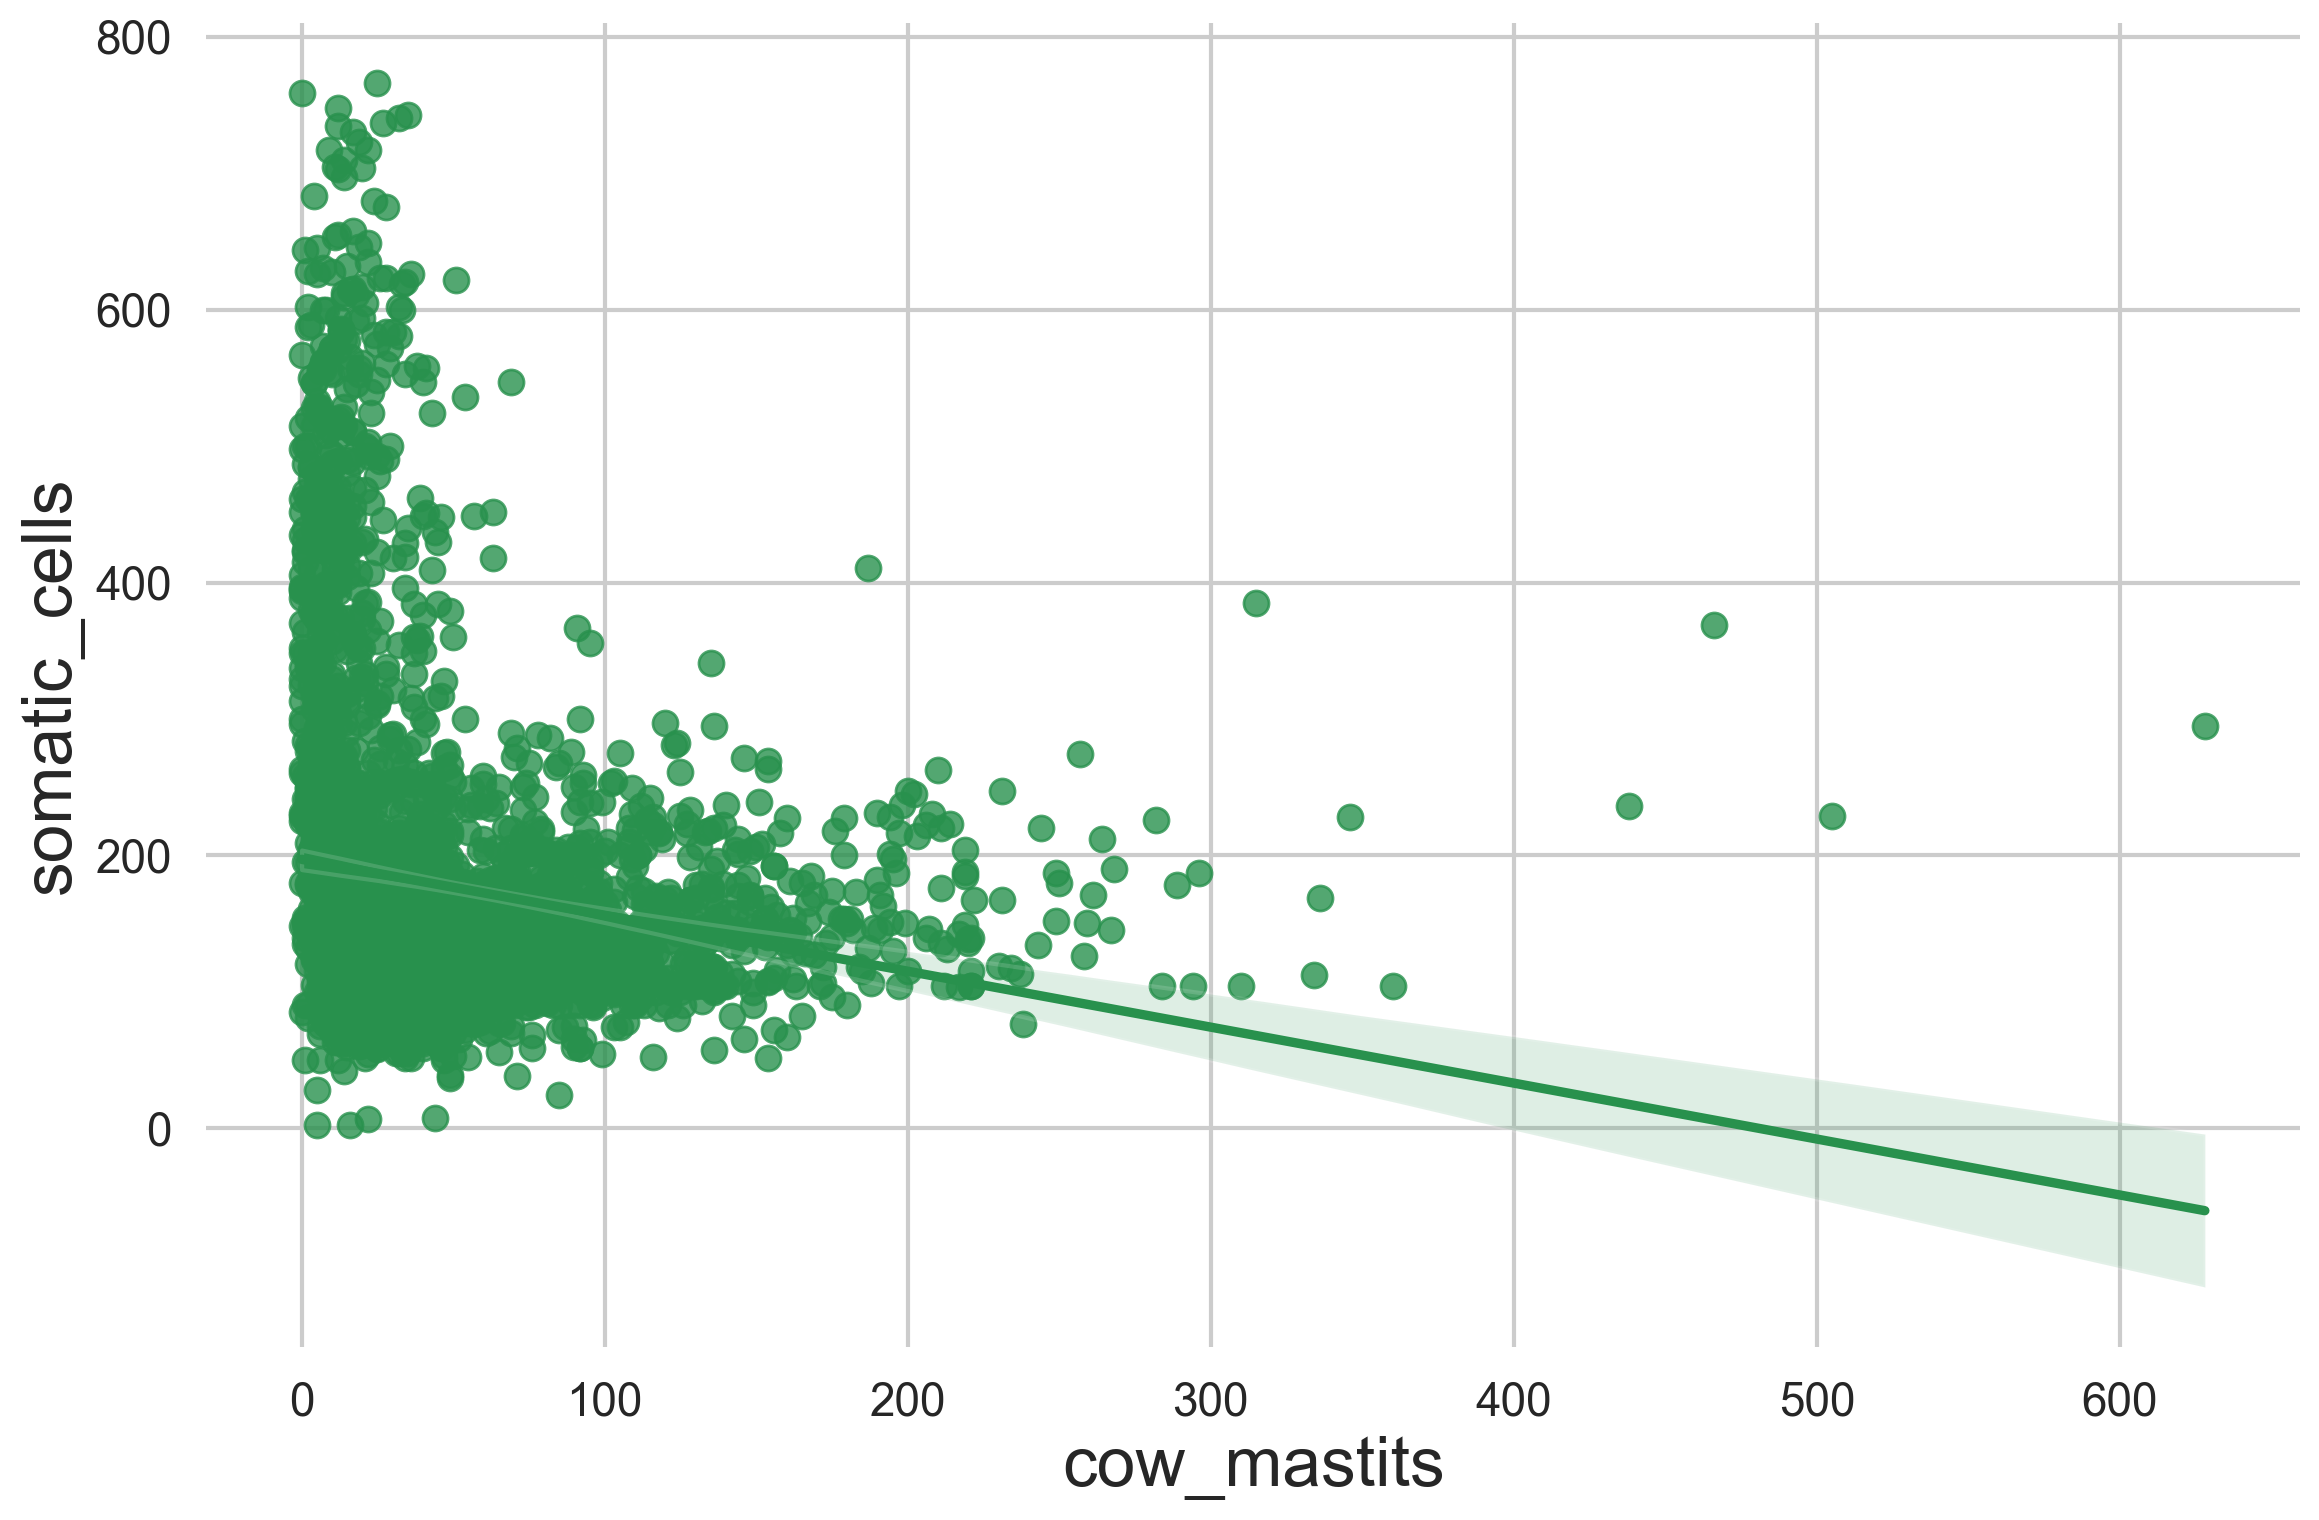

In [28]:
df_clean = herd_metrics.dropna(subset=['cow_mastits', 'somatic_cells'])
sns.regplot(data=df_clean, x='cow_mastits', y='somatic_cells')

In [29]:
herd_metrics = herd_metrics.sort_values('date')
herd_metrics['som_cells_next_month'] = herd_metrics['somatic_cells'].shift(-1)

<Axes: xlabel='som_cells_next_month', ylabel='cow_mastits'>

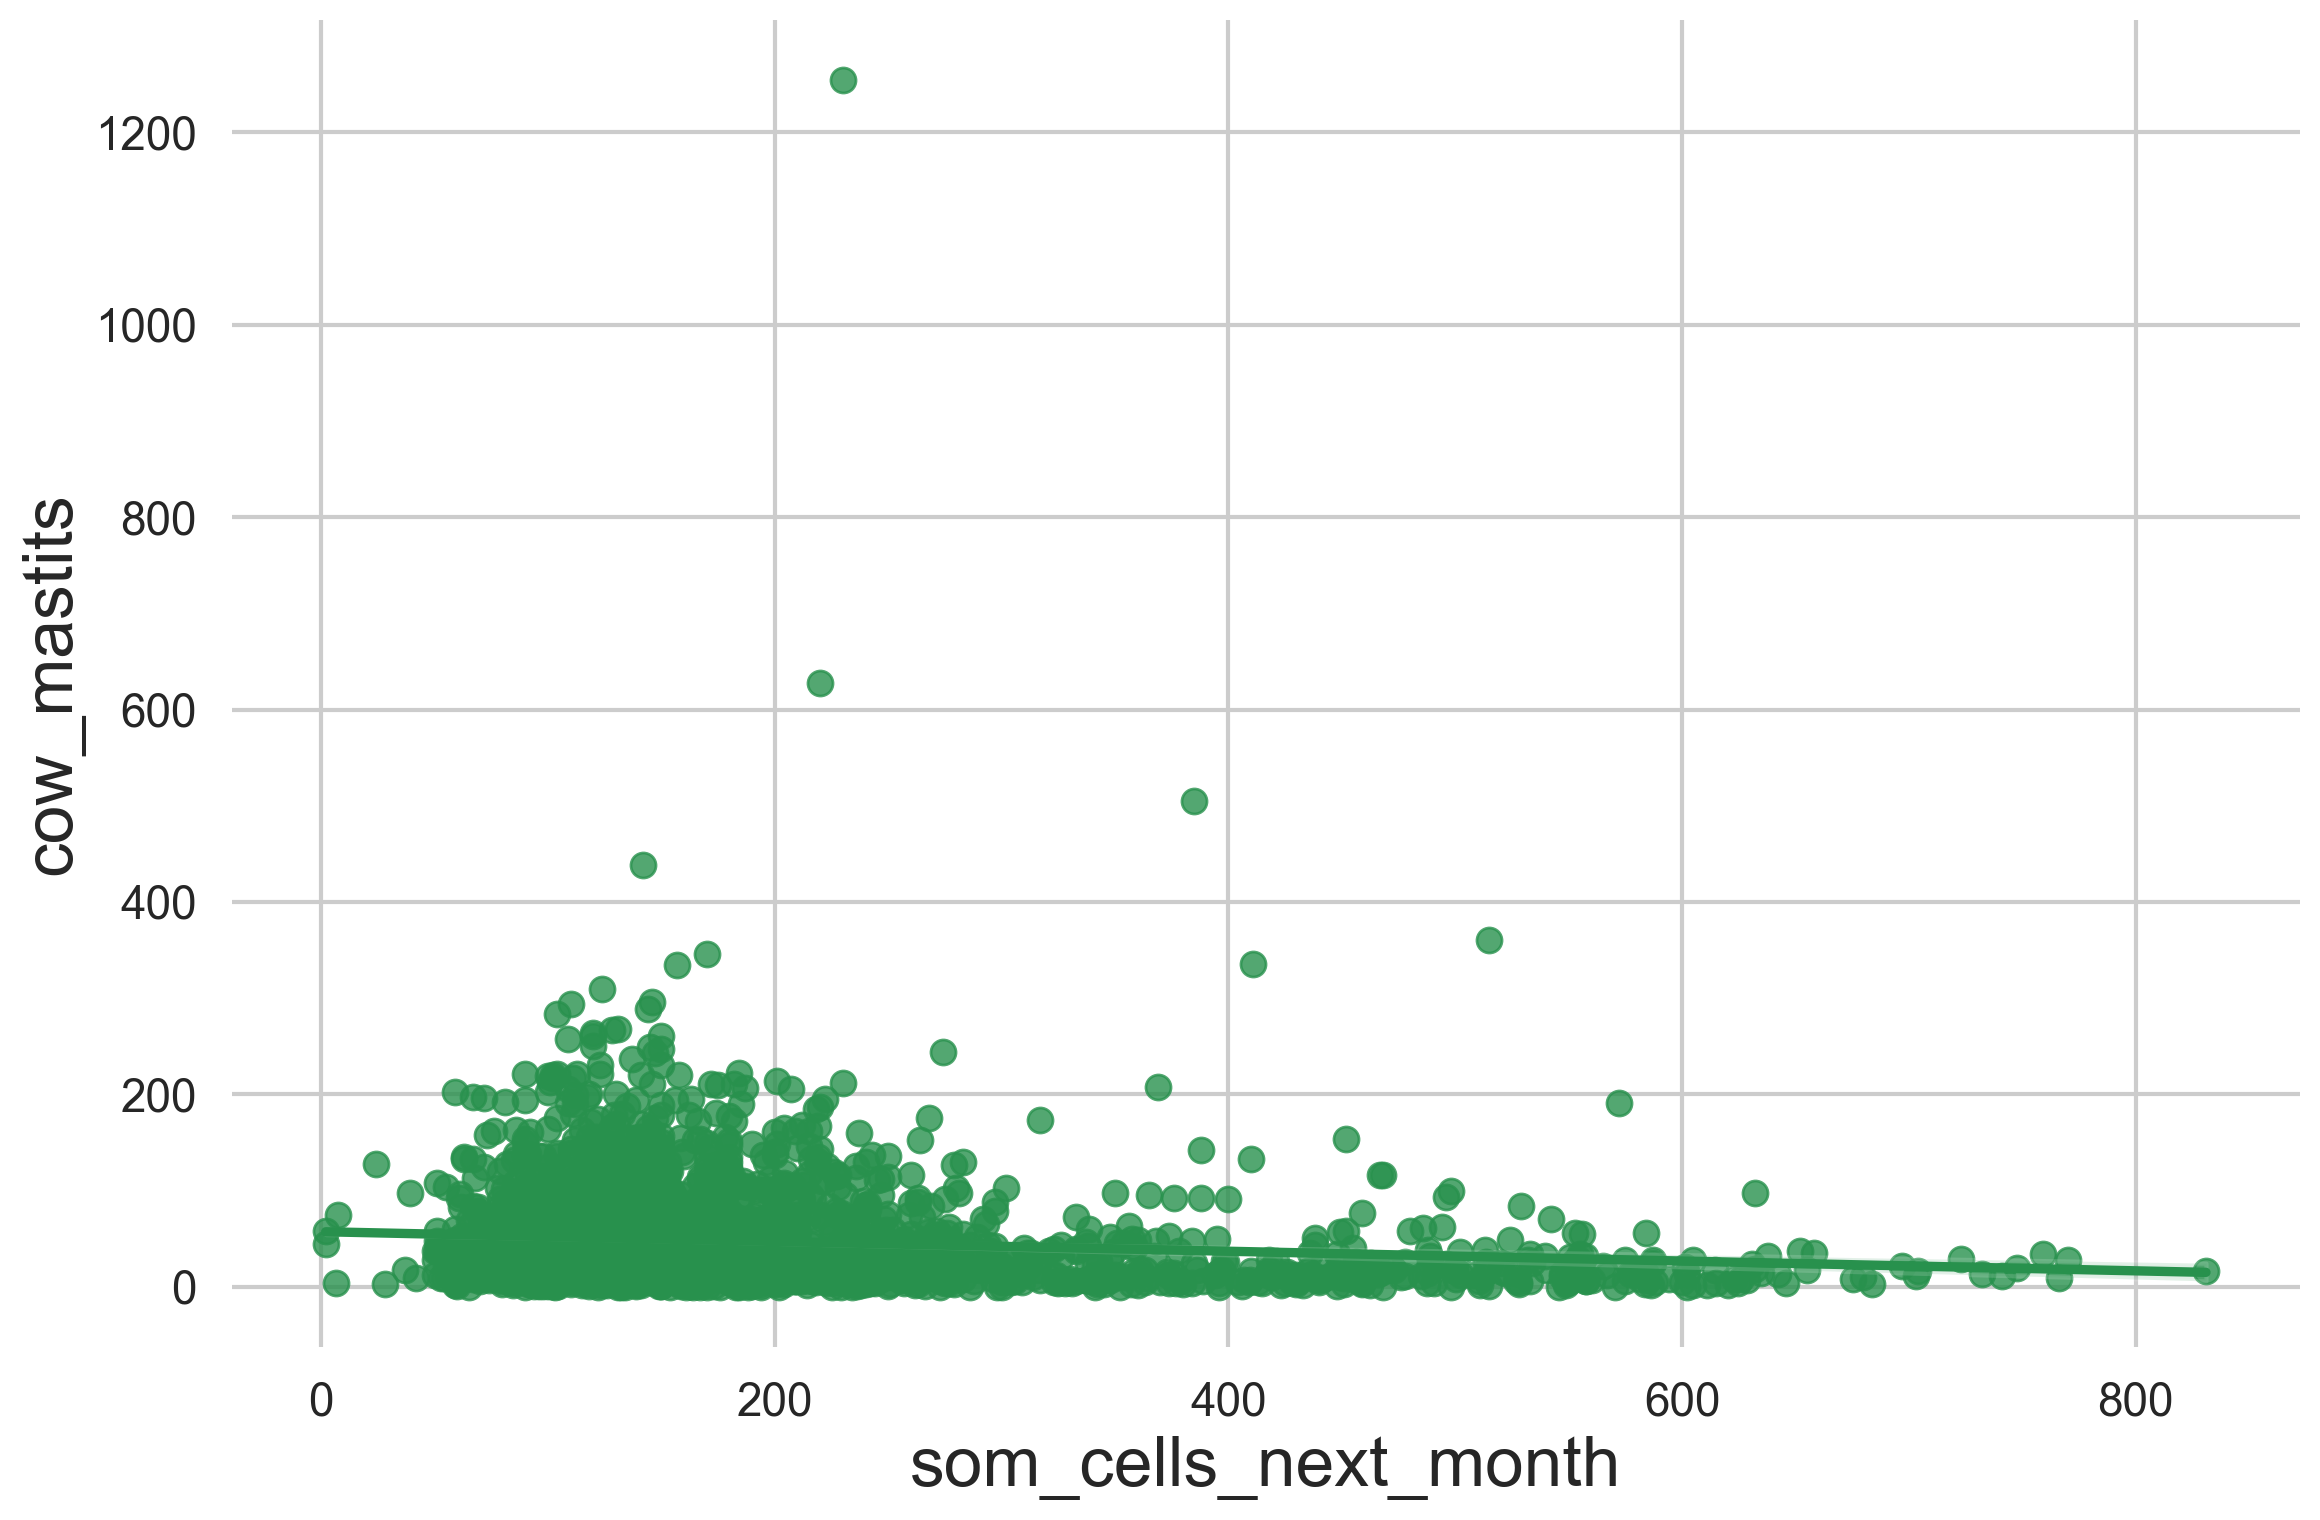

In [30]:
df_clean = herd_metrics.dropna(subset=['cow_mastits', 'som_cells_next_month'])
sns.regplot(data=df_clean, x='som_cells_next_month', y='cow_mastits')

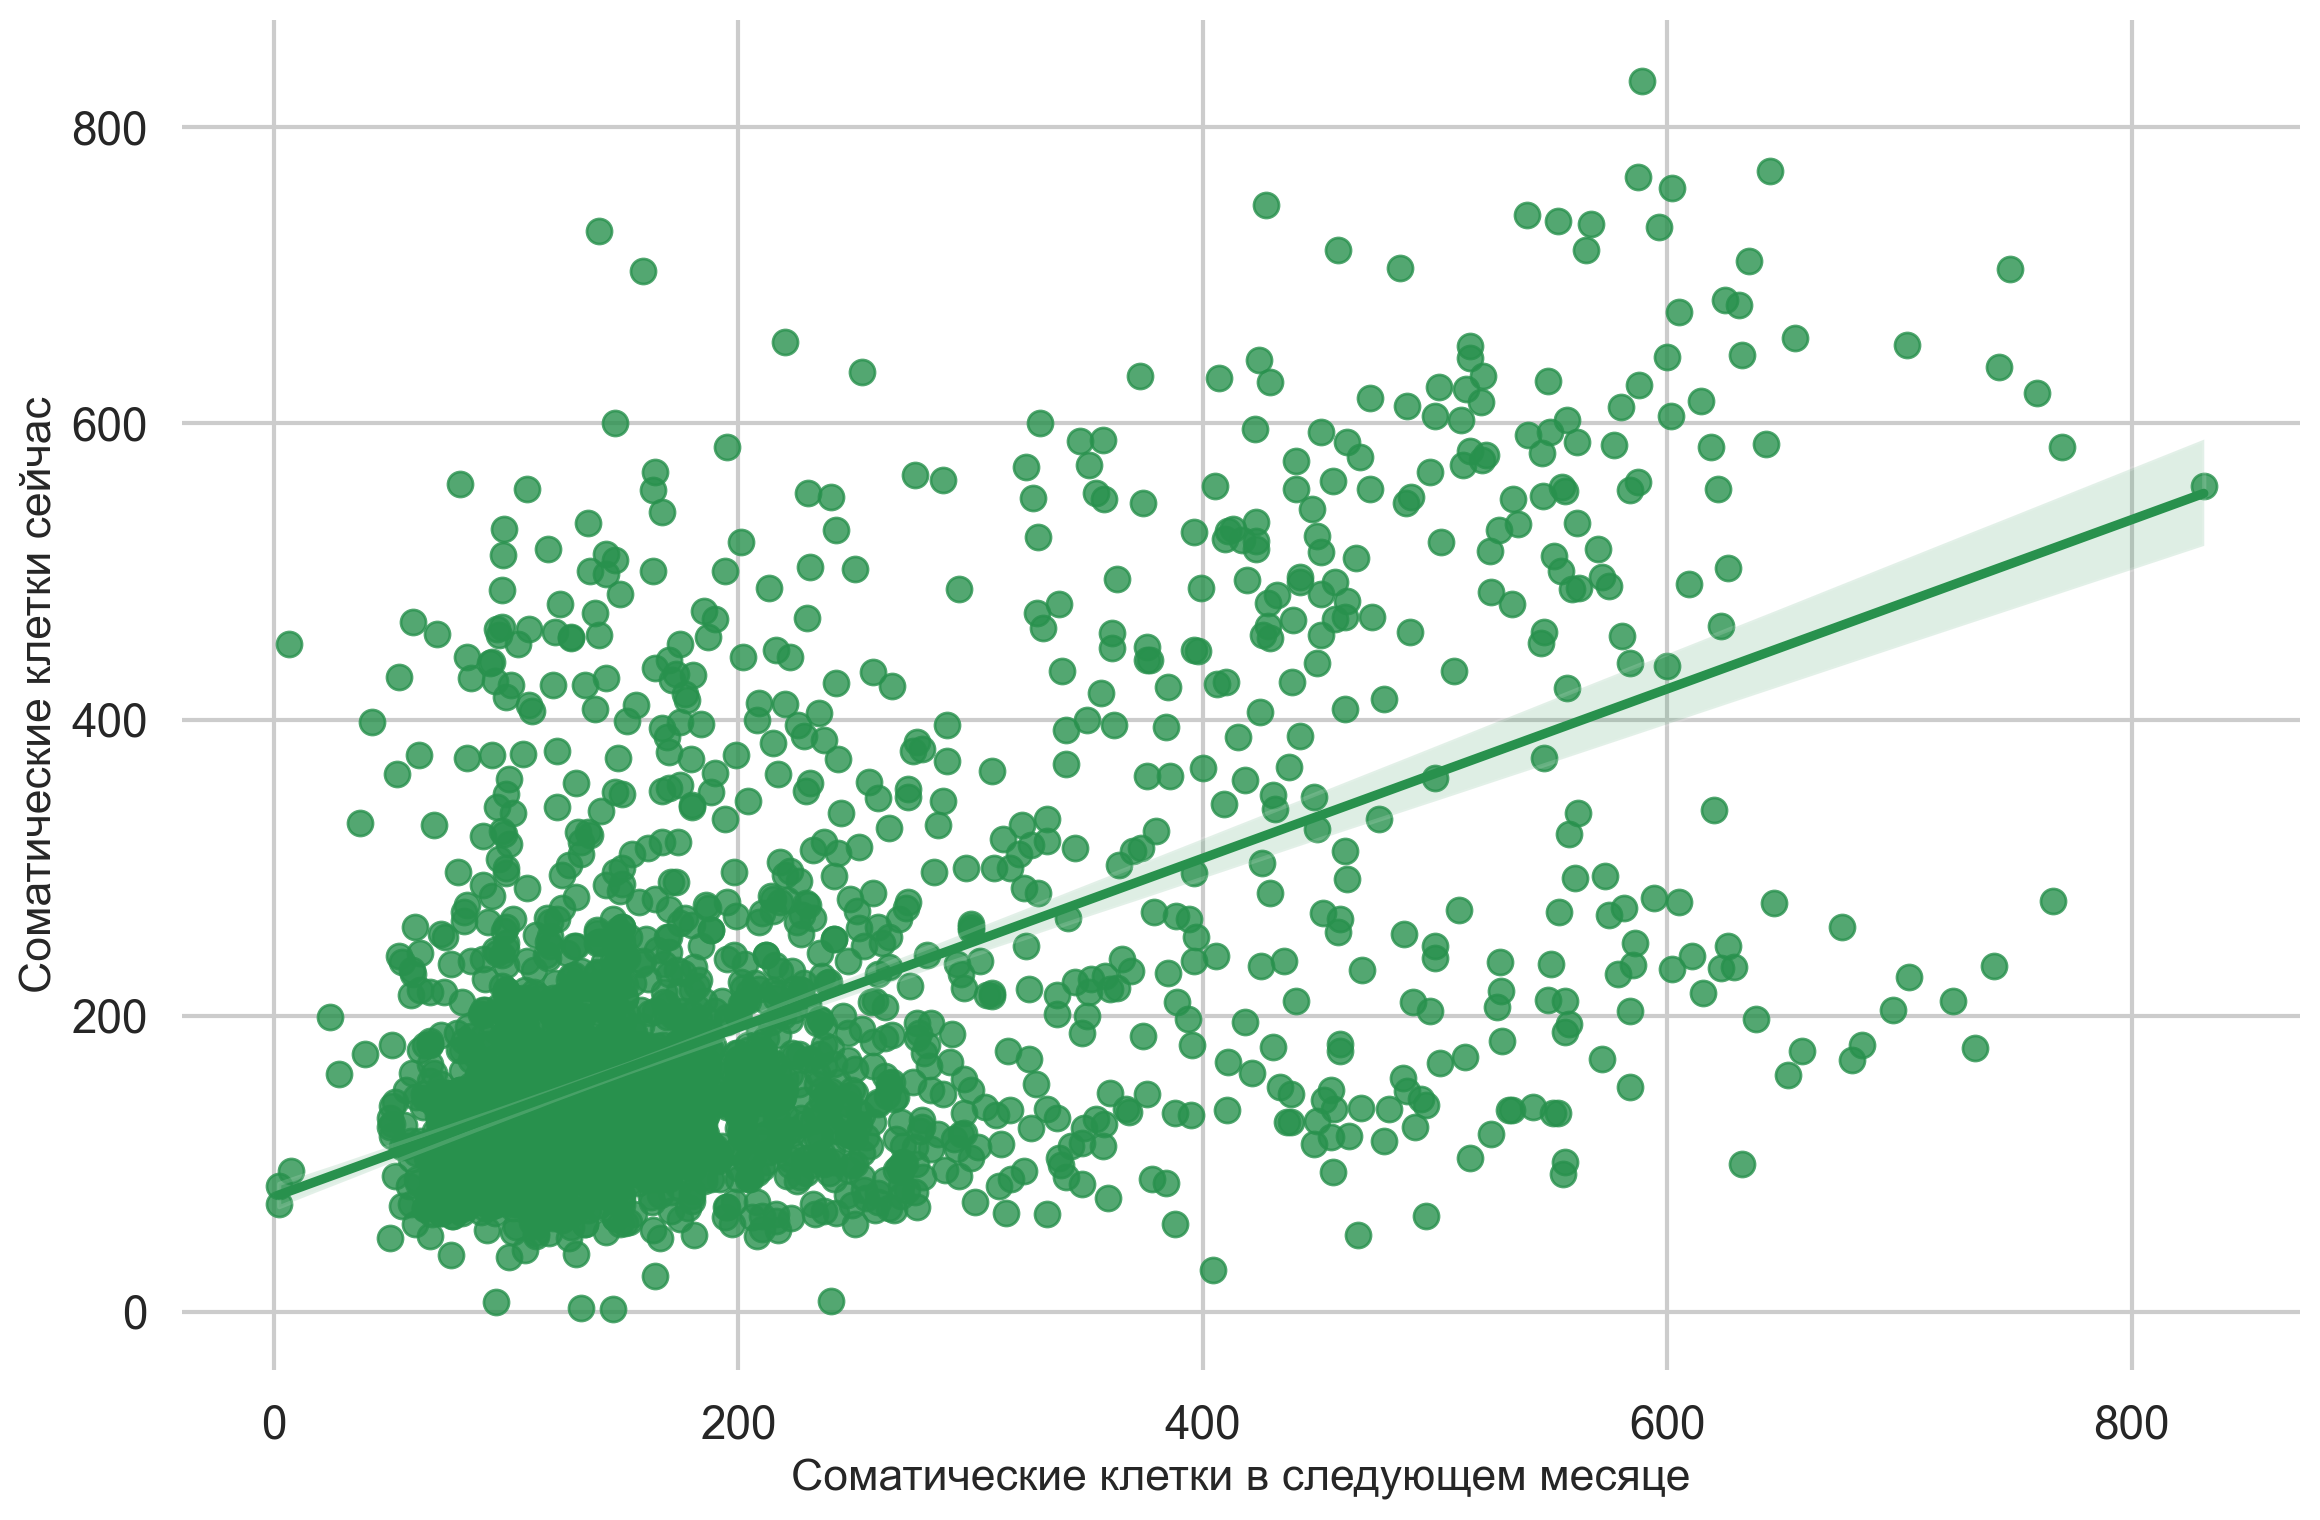

In [48]:
df_clean = herd_metrics.dropna(subset=['somatic_cells', 'som_cells_next_month'])
sns.regplot(data=df_clean, x='som_cells_next_month', y='somatic_cells')
plt.xlabel('Соматические клетки в следующем месяце', fontsize=16)
plt.ylabel('Соматические клетки сейчас', fontsize=16)
plt.savefig('val_d1.png')

In [32]:
mast_type = round(herd_metrics.groupby(['farm_type','region'])['cow_mastits'].mean() / herd_metrics['milk_cow'].mean(), 3)
mast_type

farm_type  region  
ЖК         Воронеж     0.020
           Калуга      0.036
           МоПеТю      0.025
           Поволжье    0.040
           Рязань      0.035
           Сибирь      0.050
МТФ        Воронеж     0.007
           Калуга      0.013
           Курск       0.000
           МоПеТю      0.005
           Поволжье    0.021
           Рязань      0.006
РЖК        Воронеж     0.005
           Курск       0.011
РМ         Воронеж       NaN
           Калуга      0.000
           Курск         NaN
           Рязань        NaN
           Сибирь        NaN
Name: cow_mastits, dtype: float64

In [33]:
herd_metrics[(herd_metrics['farm_type'] == 'РМ') & (herd_metrics['region'] == 'Калуга') & (herd_metrics['milk_cow'] > 0)]

Empty DataFrame
Columns: [date, region, prod_farm_name, farm_type, farm_name, ls_capacity, ls_occupancy, forage_cow, milk_cow, dry_cow, milk_marketab_prc, forcow_milk_yeild, forcow_milk_yeild_stand, milk_fat, milk_protein, somatic_cells, bac_contam, cow_retired, cow_lame, cow_mastits, calves, cow_metrit, ph_urine_avr, som_cells_next_month]
Index: []

In [34]:
type_region = herd_metrics.groupby(['farm_type', 'region']).count()
type_region

date  prod_farm_name  farm_name  ls_capacity  \
farm_type region                                                   
ЖК        Воронеж   1061            1061       1061         1061   
          Калуга     687             687        687          687   
          МоПеТю     201             201        201          201   
          Поволжье   219             219        219          219   
          Рязань     268             268        268          268   
          Сибирь     291             291        291          291   
МТФ       Воронеж    533             533        533          484   
          Калуга      68              68         68           68   
          Курск        5               5          5            5   
          МоПеТю      67              67         67           67   
          Поволжье    14              14         14           14   
          Рязань     134             134        134          110   
РЖК       Воронеж     67              67         67           67   
          Курск       50              50         50           50   
РМ        Воронеж    208             208        208            0   
          Калуга     265             265        265            1   
          Курск       30              30         30           11   
          Рязань      66              66         66            0   
          Сибирь      67              67         67           11   

                    ls_occupancy  forage_cow  milk_cow  dry_cow  \
farm_type region                                                  
ЖК        Воронеж           1061        1061      1061     1061   
          Калуга             687         687       687      687   
          МоПеТю             196         196       196      196   
          Поволжье           218         218       218      218   
          Рязань             268         268       268      268   
          Сибирь             290         291       291      291   
МТФ       Воронеж            480         480       480      480   
          Калуга              68          68        68       68   
          Курск                2           2         2        2   
          МоПеТю              67          67        67       67   
          Поволжье            14          14        14       14   
          Рязань             110         134       134      134   
РЖК       Воронеж             67          67        67       67   
          Курск               50          49        49       49   
РМ        Воронеж              0           0         0        0   
          Калуга               1           1         1        1   
          Курск                0           0         0        0   
          Рязань               0           0         0        0   
          Сибирь               0           0         0        0   

                    milk_marketab_prc  forcow_milk_yeild  \
farm_type region                                           
ЖК        Воронеж                1061                496   
          Калуга                  645                284   
          МоПеТю                  195                 93   
          Поволжье                214                111   
          Рязань                  268                124   
          Сибирь                  291                147   
МТФ       Воронеж                 475                214   
          Калуга                   68                 31   
          Курск                     2                  0   
          МоПеТю                   67                 31   
          Поволжье                 10                 10   
          Рязань                  134                 62   
РЖК       Воронеж                  67                 31   
          Курск                    49                 13   
РМ        Воронеж                   0                  0   
          Калуга                    0                  1   
          Курск                     0                  0   
          Рязань                    0      

In [62]:
farm_mast = herd_metrics.groupby('farm_type')[['cow_mastits', 'milk_cow']].sum()
otn = farm_mast['cow_mastits'] / farm_mast['milk_cow']
# farm_mast
otn

farm_type
ЖК     0.024278
МТФ    0.036249
РЖК    0.029923
РМ          NaN
dtype: float64